# Data Science Final Project

This notebook is part from the final project at introduction to data science (71253).

Authors: Yonatan Schwartz & Gali Shaani

Sumbited date: 01/08/2025

Notebook review:



# Preparations

In [85]:
# import packages
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [2]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Students Social Media Addiction.csv')

# EDA

In this code block, we present a first look at our data to reveal quick and visible information.


## General view- Formation and statistics.

In [4]:
# quick show of the data frame
df

,Student_ID,Age,Gender,Academic Level,Country,Avg Daily Usage Hours,Most Used Platform,Affects Academic Performance,Sleep Hours Per Night,Mental Health Score,Relationship Status,Conflicts Over Social Media,Addicted Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [5]:
# columns names
print(f" The data set's columns are {df.columns}")

 The data set's columns are Index(['Student_ID', 'Age', 'Gender', 'Academic Level', 'Country',
       'Avg Daily Usage Hours', 'Most Used Platform',
       'Affects Academic Performance', 'Sleep Hours Per Night',
       'Mental Health Score', 'Relationship Status',
       'Conflicts Over Social Media', 'Addicted Score'],
      dtype='object')


In [6]:
# presenting .describe() function in order to see the summary statistics
df.describe()

,Student_ID,Age,Avg Daily Usage Hours,Sleep Hours Per Night,Mental Health Score,Conflicts Over Social Media,Addicted Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


## Columns Distributions

The following blocks will show how each off our variable (column) is distributed.

### Age

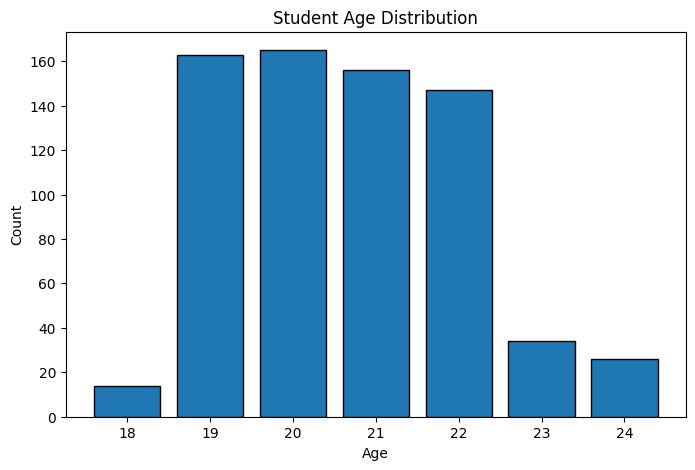

In [9]:
# Count the occurrences of each age
age_counts = df['Age'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(age_counts.index, age_counts.values, width=0.8, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Student Age Distribution')
plt.xticks(age_counts.index)
plt.show()


### Gender

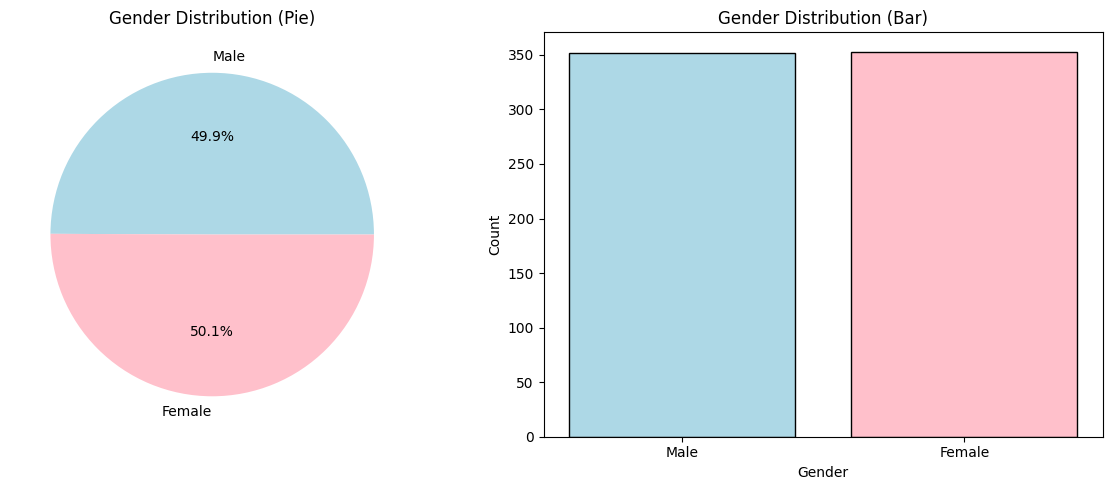

In [11]:
# plot settings
genders = ['Male', 'Female']
gender_colors = ['lightblue', 'pink']

gender_counts = df['Gender'].value_counts()
counts = [gender_counts.get(g, 0) for g in genders]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Pie chart (left)
axes[0].pie(counts, labels=genders, colors=gender_colors, autopct='%1.1f%%')
axes[0].set_title('Gender Distribution (Pie)')

# Bar chart (right)
axes[1].bar(genders, counts, color=gender_colors, edgecolor='black')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender Distribution (Bar)')

plt.tight_layout()
plt.show()


Its possible to notice that there is equal amount of male in female in the data set.

### Academic Level

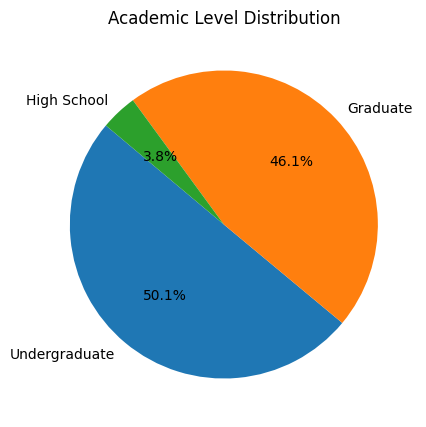

In [12]:
# plotting academic level
academic_c = df['Academic Level'].value_counts()

plt.figure(figsize=(8,5))
plt.pie(academic_c, labels=academic_c.index, autopct='%1.1f%%', startangle=140, );
plt.title('Academic Level Distribution')
plt.show()

### Countrie

In [13]:
# how many countires thers is
countries_num = len(df['Country'].unique())
print(f"There are {countries_num} countries in the data set")

There are 110 countries in the data set


In [14]:
# view all country value counts
sub_per_countrie= df['Country'].value_counts()
print (f"List of how many subjct there are in each country {sub_per_countrie}")

List of how many subjct there are in each country Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64


Because there is many countries with under 20 subject, Thus these countries can't represent a fair sample, so we will filter them out.

In [16]:
# view only countries with more than 20 subjects
countries_x = df['Country'].value_counts()[df['Country'].value_counts() >20]
countries_list= countries_x.index.tolist()


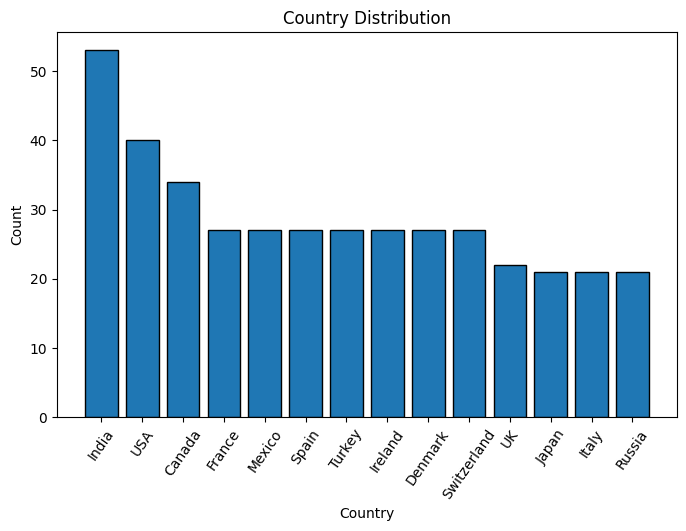

In [18]:
# plotting countrie distrbition
country_c = df['Country'].value_counts()

plt.figure(figsize=(8,5));
plt.bar(countries_list, countries_x,edgecolor='black')
plt.xticks(rotation=55)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Distribution')
plt.show()


### Avg Daily Usage Hours

First we want to justify our choise of bins number-

We accepted 15 minutes range to be logical and reasonable for social media usage.

In order to get this range we need 28 bins. Calculated as below


In [19]:
# calculating how many bins we need

min_use=df['Avg Daily Usage Hours'].min()
max_use= df['Avg Daily Usage Hours'].max()
tot_use_range= max_use - min_use
bins_num= tot_use_range / 0.25
print(f"The number of bins is {bins_num}")

The number of bins is 28.0


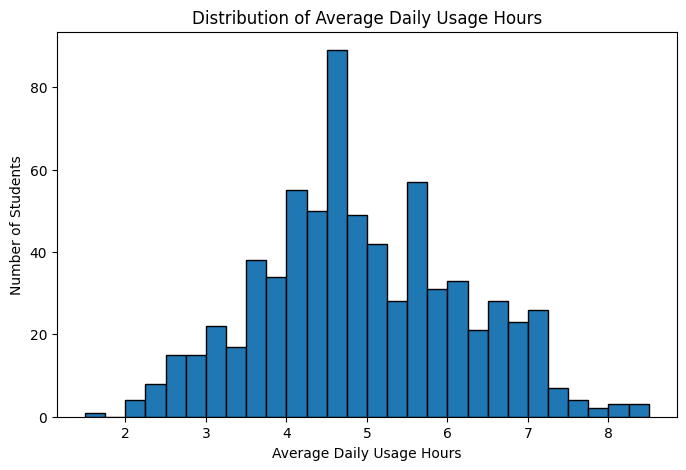

In [20]:
# plotting avg daiuly usage hours

usage_hours = df['Avg Daily Usage Hours']

plt.figure(figsize=(8,5))
plt.hist(usage_hours,bins=28, edgecolor='black')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Number of Students')
plt.title('Distribution of Average Daily Usage Hours')
plt.show()


### Most Used Platform

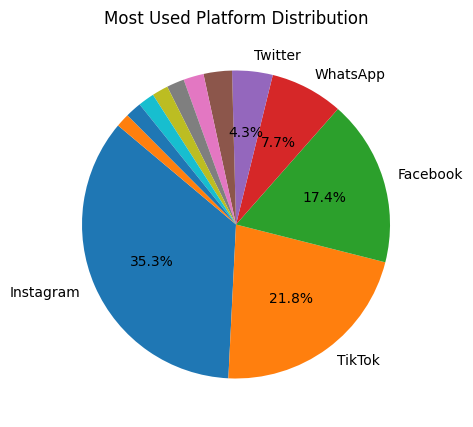

In [29]:
import matplotlib.pyplot as plt

# Calculate platform counts and percentages
platform_counts = df['Most Used Platform'].value_counts()
platform_percents = 100 * platform_counts / platform_counts.sum()

# Build labels: show name only if percent >= 1, else empty
labels = [name if pct >= 3 else '' for name, pct in zip(platform_counts.index, platform_percents)]

# Custom autopct function: show percent only if >= 1%
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct >= 3 else ''

plt.figure(figsize=(8,5))
plt.pie(platform_counts, labels=labels, autopct=autopct_func, startangle=140)
plt.title('Most Used Platform Distribution')
plt.show()


Presenting only platform with more than 3% in order to keep it relevant and nicely visible.

### Affects Academic Preformance

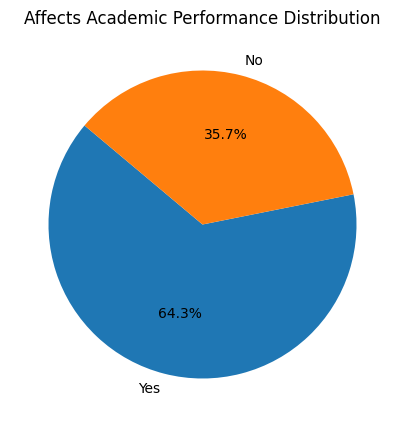

In [30]:
# plotting  Affects Academic Preformance
affects_acad= df['Affects Academic Performance'].value_counts()

plt.figure(figsize=(8,5))
plt.pie(affects_acad, labels=affects_acad.index, autopct='%1.1f%%', startangle=140)
plt.title('Affects Academic Performance Distribution')
plt.show()

### Sleep Houes Per Night

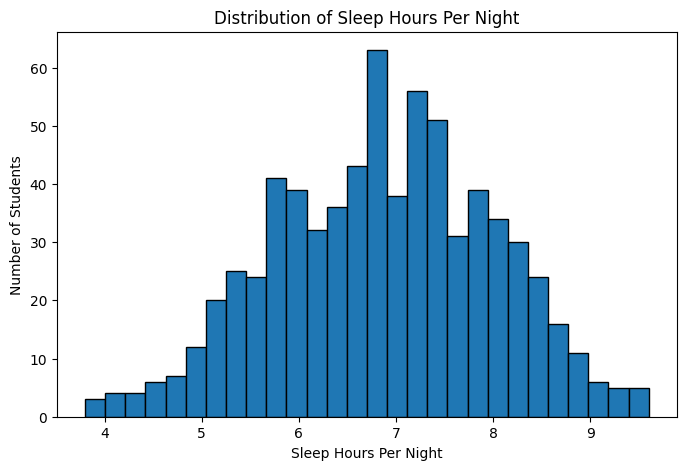

In [31]:
# plotting sleep hours per night
sleep_hours = df['Sleep Hours Per Night']

plt.figure(figsize=(8,5))
plt.hist(sleep_hours,bins=28, edgecolor='black')
plt.xlabel('Sleep Hours Per Night')
plt.ylabel('Number of Students')
plt.title('Distribution of Sleep Hours Per Night')
plt.show()

### Mental Healt Score

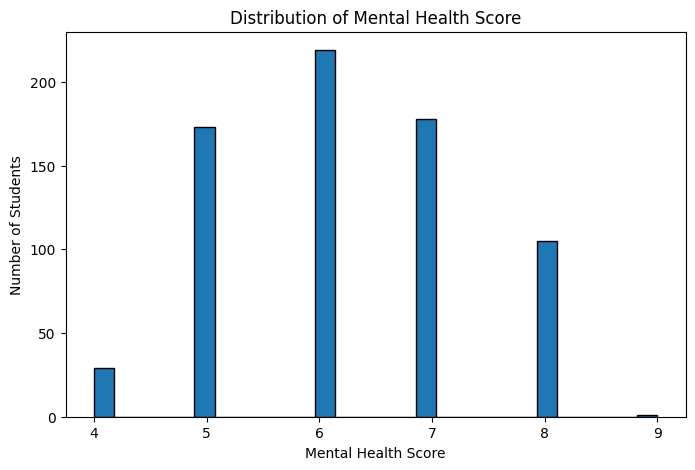

In [32]:
# plotting Mental Helath Score
mental_score = df['Mental Health Score']

plt.figure(figsize=(8,5))
plt.hist(mental_score, bins=28 ,edgecolor='black')
plt.xlabel('Mental Health Score')
plt.ylabel('Number of Students')
plt.title('Distribution of Mental Health Score')
plt.show()

### Relationship Status

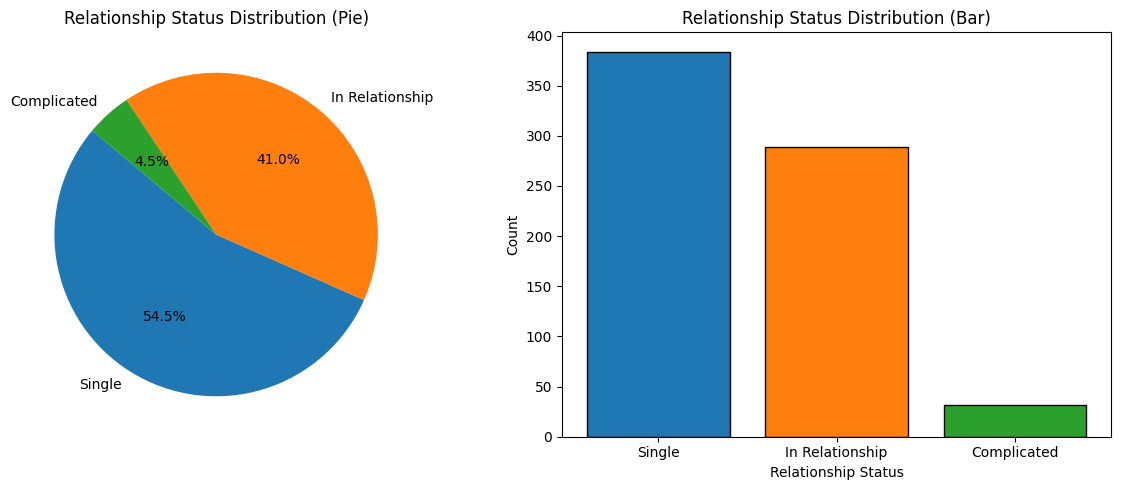

In [33]:
# plotting Relationship Status

relationship = df['Relationship Status'].value_counts()

# Define color palette (one color for each status, order matches the data)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # blue, orange, green

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart (left)
axes[0].pie(relationship, labels=relationship.index, autopct='%1.1f%%',
            startangle=140, colors=colors)
axes[0].set_title('Relationship Status Distribution (Pie)')

# Bar chart (right)
axes[1].bar(relationship.index, relationship.values, color=colors, edgecolor='black')
axes[1].set_title('Relationship Status Distribution (Bar)')
axes[1].set_xlabel('Relationship Status')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.show()


### Conflicts Over Social Media

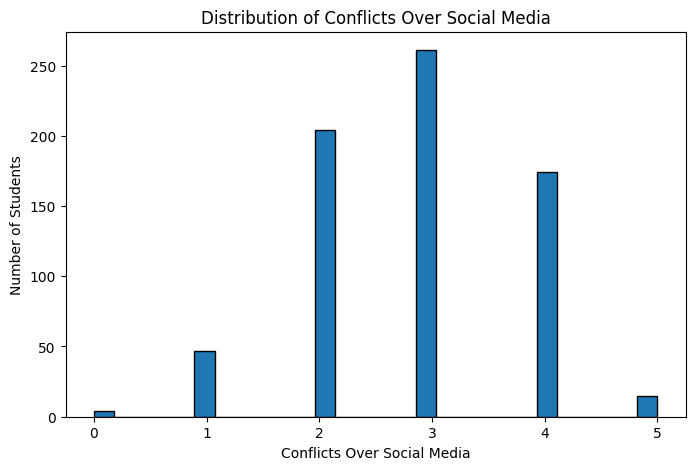

In [34]:
# plotting Conflicts Over Social Media
conflicts_sm = df['Conflicts Over Social Media']

plt.figure(figsize=(8,5))
plt.hist(conflicts_sm, bins=28, edgecolor='black')
plt.xlabel('Conflicts Over Social Media')
plt.ylabel('Number of Students')
plt.title('Distribution of Conflicts Over Social Media')
plt.show()

### Addicted Score

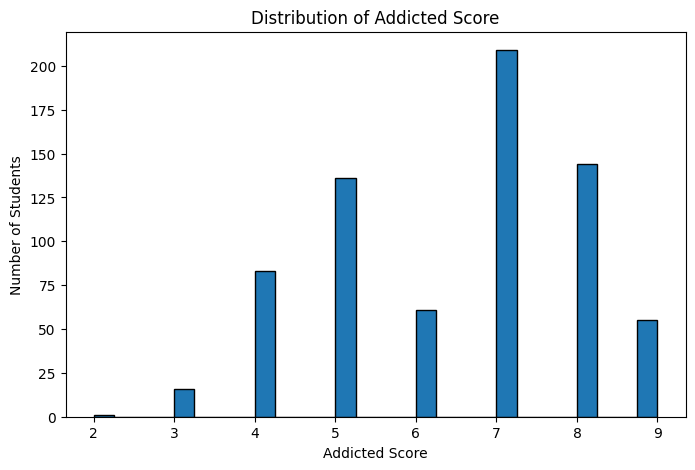

In [35]:
# plotting addicted score
addicted_score = df['Addicted Score']

plt.figure(figsize=(8,5))
plt.hist(addicted_score, bins=28, edgecolor='black')
plt.xlabel('Addicted Score')
plt.ylabel('Number of Students')
plt.title('Distribution of Addicted Score')
plt.show()

## Relationships Between Variables

This code block present pair plot and correlation matrix and choosen scatter plots.

### Pair Plot

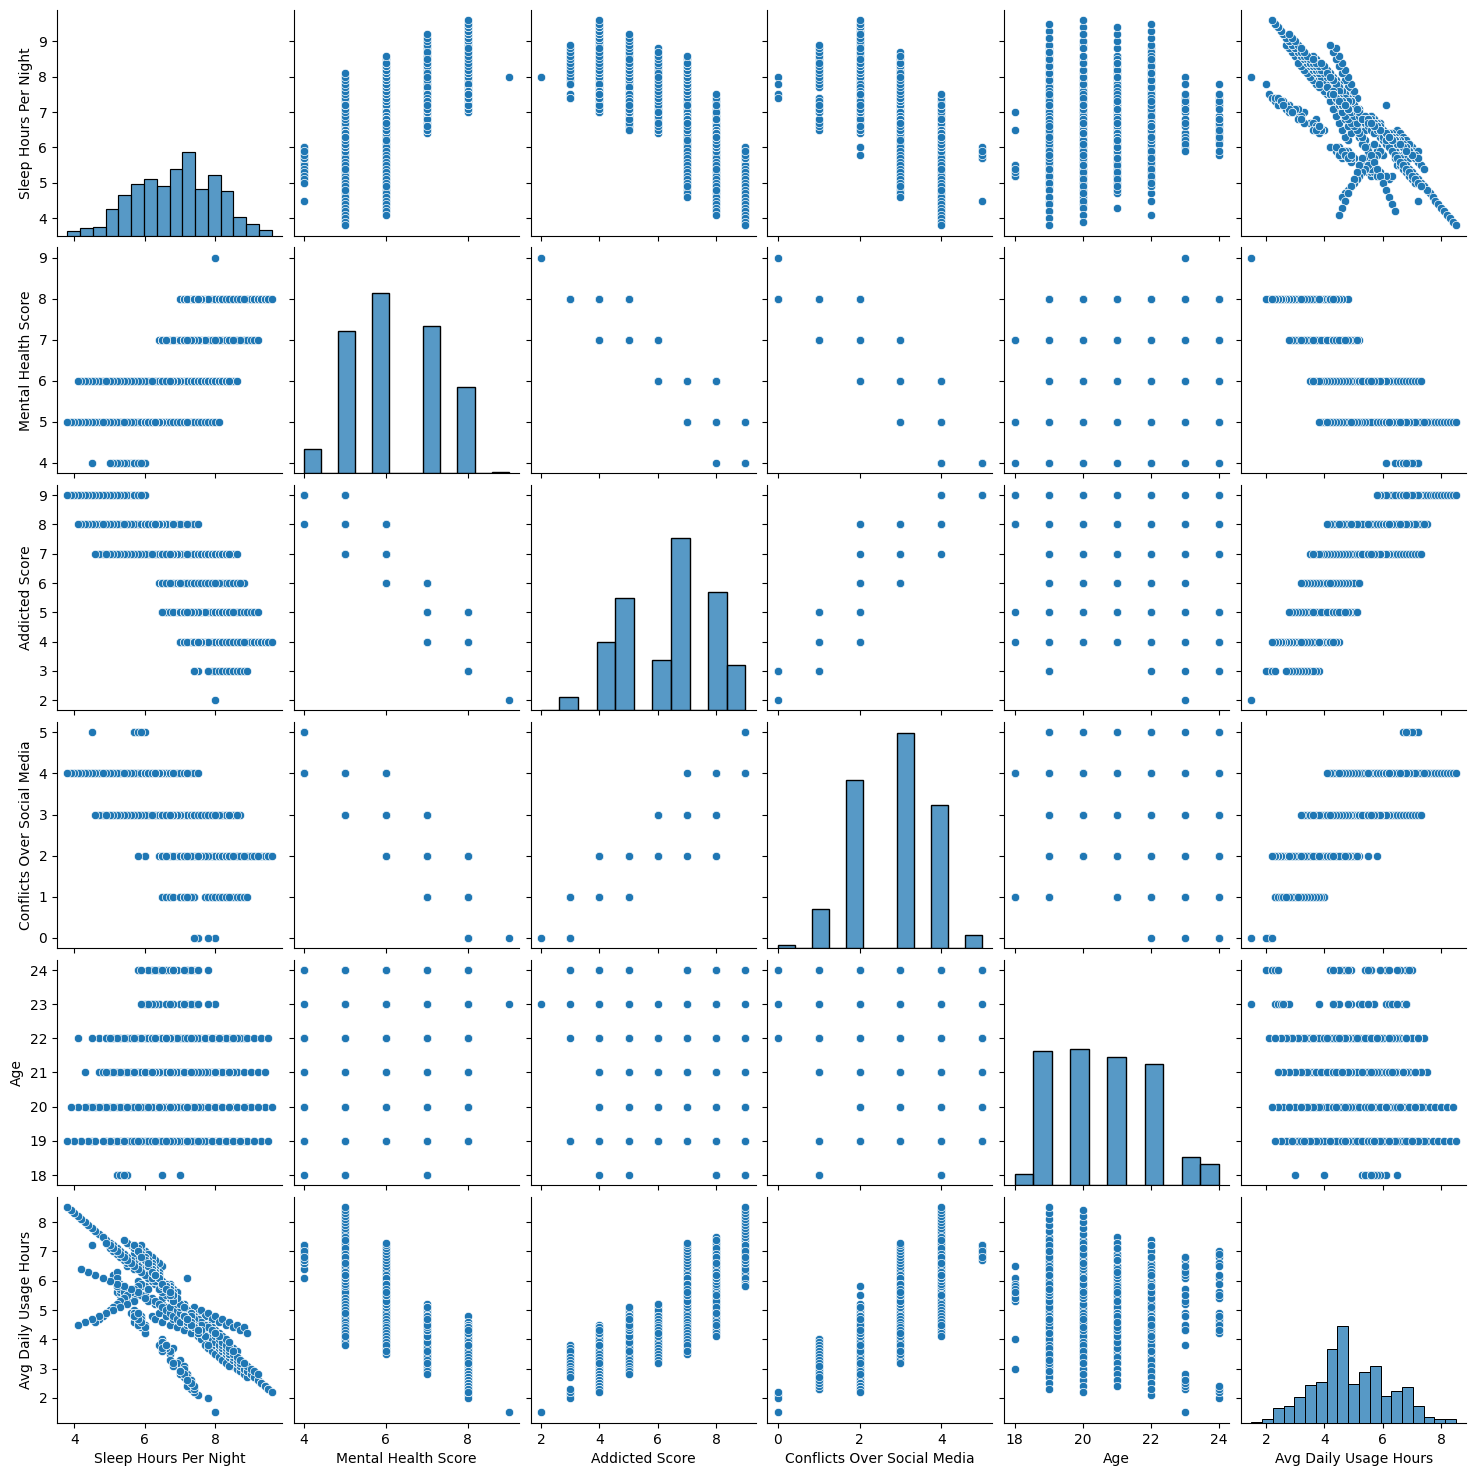

In [36]:
# pairplot of the dataset

sns.pairplot(df, vars=['Sleep Hours Per Night', 'Mental Health Score', 'Addicted Score', 'Conflicts Over Social Media','Age', 'Avg Daily Usage Hours'])
plt.show()

### Correlation Matrix

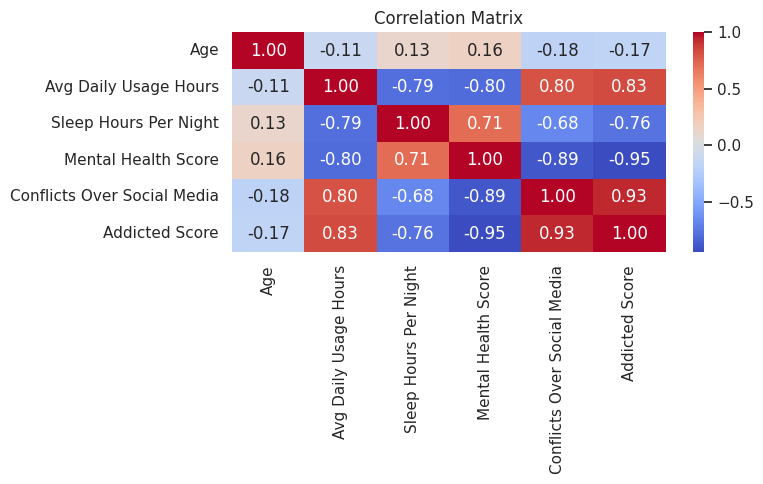

In [107]:
# plotting a correlation martrix between all numeric variations

numeric_columns = [
    "Age", "Avg Daily Usage Hours", "Sleep Hours Per Night",
    "Mental Health Score", "Conflicts Over Social Media", "Addicted Score"
]

plt.figure(figsize=(8, 5))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### Scatter plot of Most Used Platform vs Avg Daily Usage Hours


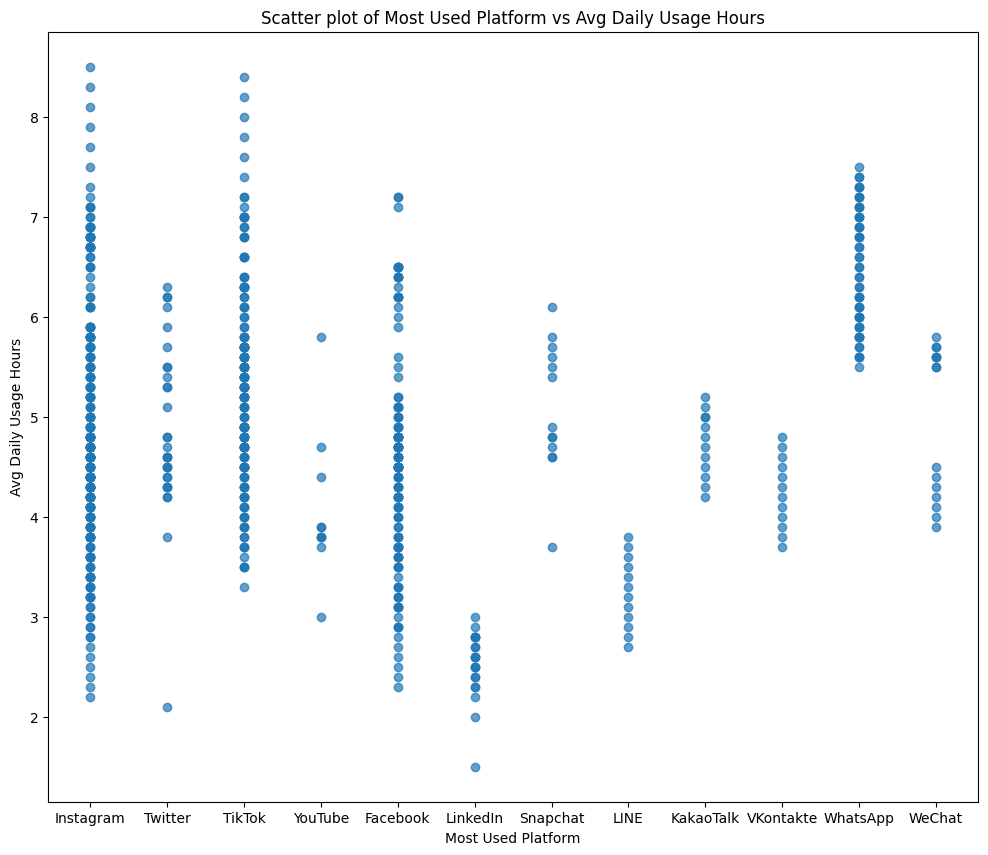

In [38]:
# scatter plot of Most Used Platform vs Avg Daily Usage Hours
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame containing the relevant columns
plt.figure(figsize=(12, 10))
plt.scatter(df['Most Used Platform'], df['Avg Daily Usage Hours'], alpha=0.7)
plt.xlabel('Most Used Platform')
plt.ylabel('Avg Daily Usage Hours')
plt.title('Scatter plot of Most Used Platform vs Avg Daily Usage Hours')
plt.show()


## Processing Variations

Before we contionue to the next part we change categorical variations to ordinals.

In [40]:
# turning academic level into a categorical variable

df['Academic Level'] = pd.Categorical(df['Academic Level'], categories=['High School', 'Undergraduate', 'Graduate',], ordered=True)
df['Academic Level'].unique()

['Undergraduate', 'Graduate', 'High School']
Categories (3, object): ['High School' < 'Undergraduate' < 'Graduate']

In [41]:
# turning realationship status into a categorical variable

df['Relationships Status'] = pd.Categorical(df['Relationship Status'], categories=['Single','Complicated', 'In Relationship'], ordered=True)
df['Relationships Status'].unique()

['In Relationship', 'Single', 'Complicated']
Categories (3, object): ['Single' < 'Complicated' < 'In Relationship']

# Deep Analysis

## Subplot by main variations

We chose 5 main object type variations-

Gender, Countrie, Age, Mental Healt and Platform.


### By Gender

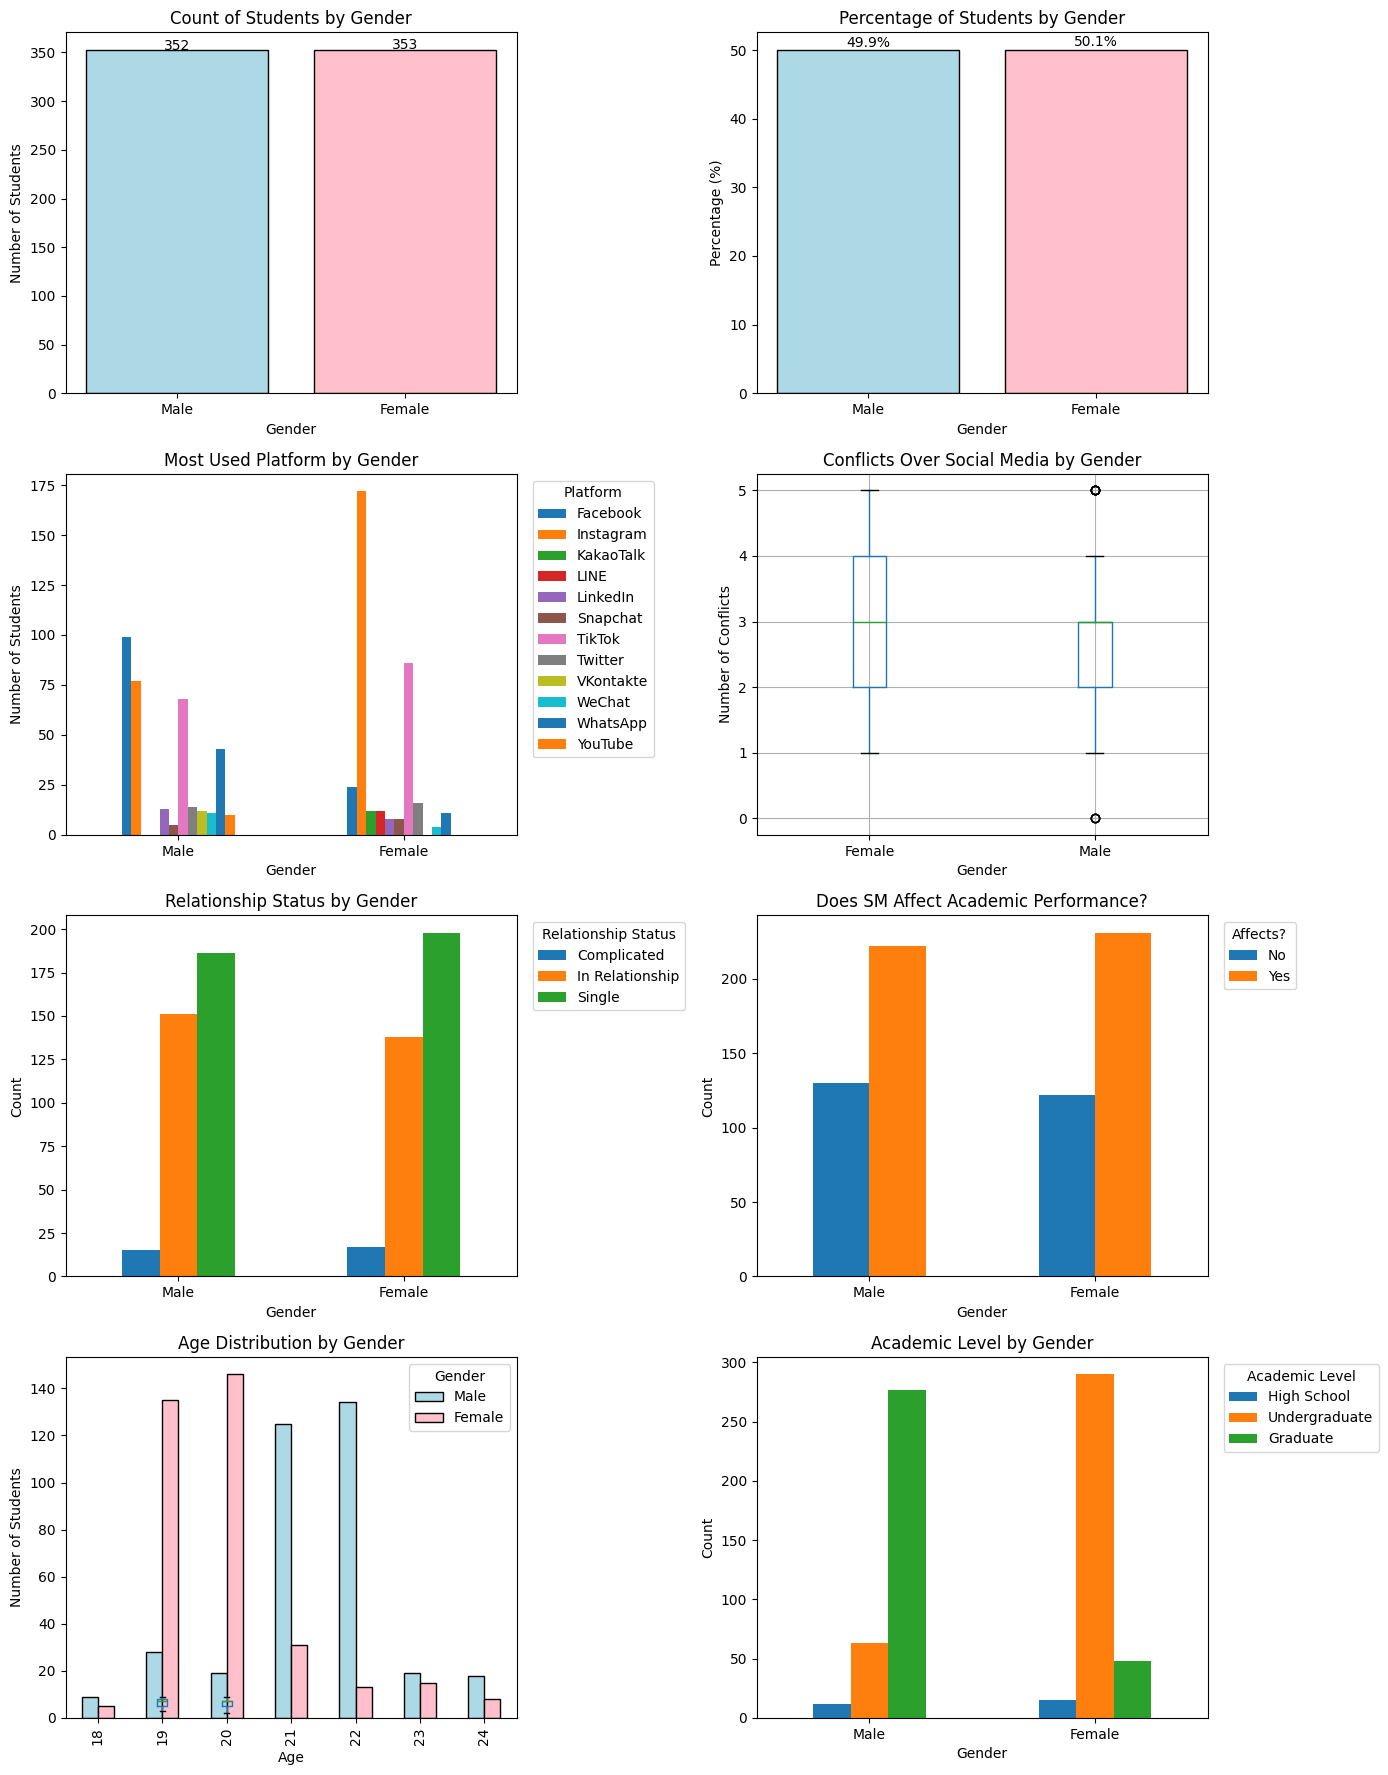

In [58]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Count of students by gender
axes[0, 0].bar(genders, counts, color=gender_colors, edgecolor='black')
axes[0, 0].set_title('Count of Students by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Number of Students')
for i, v in enumerate(counts):
    axes[0, 0].text(i, v + 1, str(v), ha='center')

# Percentage of students by gender
gender_pct = [100 * v / sum(counts) for v in counts]
axes[0, 1].bar(genders, gender_pct, color=gender_colors, edgecolor='black')
axes[0, 1].set_title('Percentage of Students by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Percentage (%)')
for i, v in enumerate(gender_pct):
    axes[0, 1].text(i, v + 0.5, f"{v:.1f}%", ha='center')

# Most Used Platform by Gender
platform_ct = pd.crosstab(df['Gender'], df['Most Used Platform']).reindex(index=genders)
platform_ct.plot(kind='bar', ax=axes[1, 0], rot=0, color=None)
axes[1, 0].set_title('Most Used Platform by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Number of Students')
axes[1, 0].legend(title='Platform', bbox_to_anchor=(1.02, 1), loc='upper left')

# Conflicts Over Social Media by Gender
df.boxplot(column='Conflicts Over Social Media', by='Gender', ax=axes[1, 1])
axes[1, 1].set_title('Conflicts Over Social Media by Gender')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Number of Conflicts')
plt.suptitle('')  # Remove automatic suptitle

# Relationship Status by Gender
rel_ct = pd.crosstab(df['Gender'], df['Relationship Status']).reindex(index=genders)
rel_ct.plot(kind='bar', stacked=False, ax=axes[2, 0], rot=0)
axes[2, 0].set_title('Relationship Status by Gender')
axes[2, 0].set_xlabel('Gender')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Relationship Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# (6) Affects Academic Performance by Gender
affect_ct = pd.crosstab(df['Gender'], df['Affects Academic Performance']).reindex(index=genders)
affect_ct.plot(kind='bar', ax=axes[2, 1], rot=0)
axes[2, 1].set_title('Does SM Affect Academic Performance?')
axes[2, 1].set_xlabel('Gender')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='Affects?', bbox_to_anchor=(1.02, 1), loc='upper left')

# Addicted Score by Gender
df.boxplot(column='Addicted Score', by='Gender', ax=axes[3, 0])
axes[3, 0].set_title('Addicted Score by Gender')
axes[3, 0].set_xlabel('Gender')
axes[3, 0].set_ylabel('Addicted Score')
plt.suptitle('')  # Remove automatic suptitle

# Academic Level by Gender
acad_ct = pd.crosstab(df['Gender'], df['Academic Level']).reindex(index=genders)
acad_ct.plot(kind='bar', ax=axes[3, 1], rot=0)
axes[3, 1].set_title('Academic Level by Gender')
axes[3, 1].set_xlabel('Gender')
axes[3, 1].set_ylabel('Count')
axes[3, 1].legend(title='Academic Level', bbox_to_anchor=(1.02, 1), loc='upper left')


# Create an age-gender cross-tab (pivot table)
age_gender_ct = pd.crosstab(df['Age'], df['Gender'])[genders]  # Ensures order matches genders list

# Plot as a grouped bar chart
age_gender_ct.plot(kind='bar', ax=axes[3, 0], color=gender_colors, edgecolor='black')
axes[3, 0].set_title('Age Distribution by Gender')
axes[3, 0].set_xlabel('Age')
axes[3, 0].set_ylabel('Number of Students')
axes[3, 0].legend(title='Gender')

plt.tight_layout()
plt.show()


### By Countrie

* With more than 20 subjects.

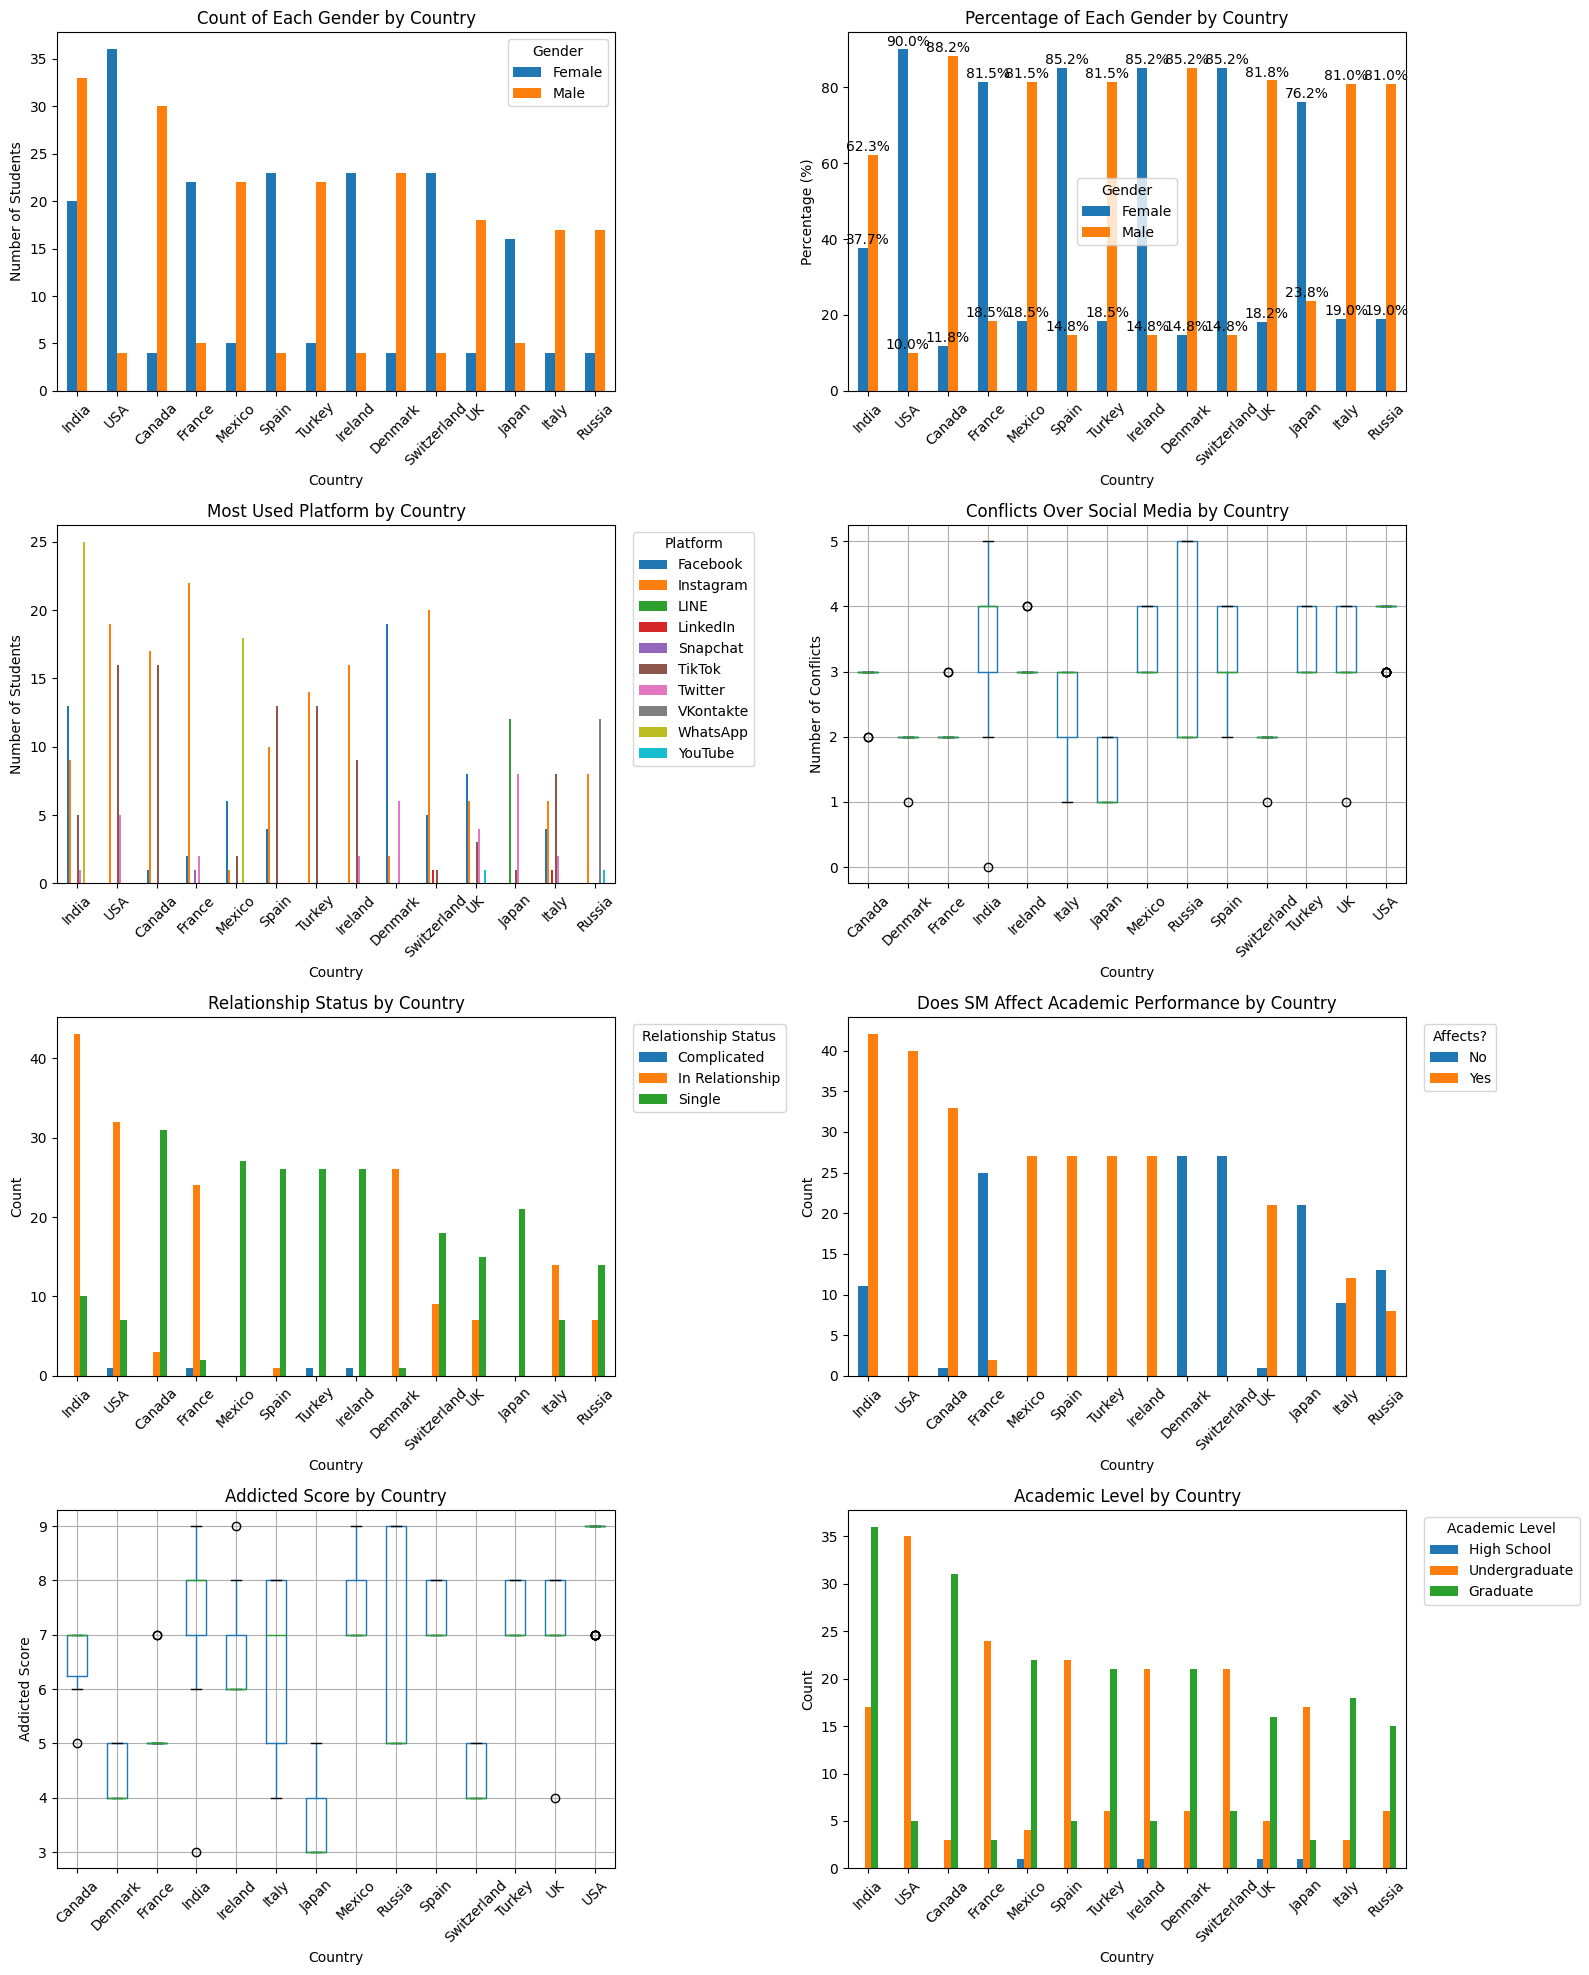

In [59]:
# Identify countries with more than 20 subjects
country_counts = df['Country'].value_counts()
valid_countries = country_counts[country_counts > 20].index.tolist()

# Filter the DataFrame to include only those countries
df_filtered = df[df['Country'].isin(valid_countries)].copy()

# Prepare a 4×2 grid for eight subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Quantity of Each Gender by Country
gender_ct = pd.crosstab(df_filtered['Country'], df_filtered['Gender']).loc[valid_countries]
gender_ct.plot(kind='bar', ax=axes[0, 0], rot=45)
axes[0, 0].set_title('Count of Each Gender by Country')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Number of Students')
axes[0, 0].legend(title='Gender')


# Percentage of Each Gender by Country
# Compute percentages within each country
gender_pct = gender_ct.div(gender_ct.sum(axis=1), axis=0) * 100
gender_pct.plot(kind='bar', ax=axes[0, 1], rot=45)
axes[0, 1].set_title('Percentage of Each Gender by Country')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Percentage (%)')
for country_idx, country in enumerate(valid_countries):
    for gender_idx, pct in enumerate(gender_pct.loc[country].values):
        axes[0, 1].text(country_idx, pct + 1, f"{pct:.1f}%", ha='center')
axes[0, 1].legend(title='Gender')


# Most Used Platform by Country
platform_ct = pd.crosstab(df_filtered['Country'], df_filtered['Most Used Platform']).loc[valid_countries]
platform_ct.plot(kind='bar', ax=axes[1, 0], rot=45)
axes[1, 0].set_title('Most Used Platform by Country')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Number of Students')
axes[1, 0].legend(title='Platform', bbox_to_anchor=(1.02, 1), loc='upper left')

# Conflicts Over Social Media by Country
# Boxplot of "Conflicts Over Social Media" for each valid country
df_filtered.boxplot(column='Conflicts Over Social Media', by='Country', ax=axes[1, 1])
axes[1, 1].set_title('Conflicts Over Social Media by Country')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Number of Conflicts')
plt.suptitle('')  # Remove pandas’ automatic suptitle

# Relationship Status by Country
rel_ct = pd.crosstab(df_filtered['Country'], df_filtered['Relationship Status']).loc[valid_countries]
rel_ct.plot(kind='bar', ax=axes[2, 0], rot=45)
axes[2, 0].set_title('Relationship Status by Country')
axes[2, 0].set_xlabel('Country')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Relationship Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Affects Academic Performance by Country
affect_ct = pd.crosstab(df_filtered['Country'], df_filtered['Affects Academic Performance']).loc[valid_countries]
affect_ct.plot(kind='bar', ax=axes[2, 1], rot=45)
axes[2, 1].set_title('Does SM Affect Academic Performance by Country')
axes[2, 1].set_xlabel('Country')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='Affects?', bbox_to_anchor=(1.02, 1), loc='upper left')

# Addicted Score by Country
df_filtered.boxplot(column='Addicted Score', by='Country', ax=axes[3, 0])
axes[3, 0].set_title('Addicted Score by Country')
axes[3, 0].set_xlabel('Country')
axes[3, 0].set_ylabel('Addicted Score')
plt.suptitle('')


# Academic Level by Country
acad_ct = pd.crosstab(df_filtered['Country'], df_filtered['Academic Level']).loc[valid_countries]
acad_ct.plot(kind='bar', ax=axes[3, 1], rot=45)
axes[3, 1].set_title('Academic Level by Country')
axes[3, 1].set_xlabel('Country')
axes[3, 1].set_ylabel('Count')
axes[3, 1].legend(title='Academic Level', bbox_to_anchor=(1.02, 1), loc='upper left')

# Final adjustments and show
for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()



### By Age

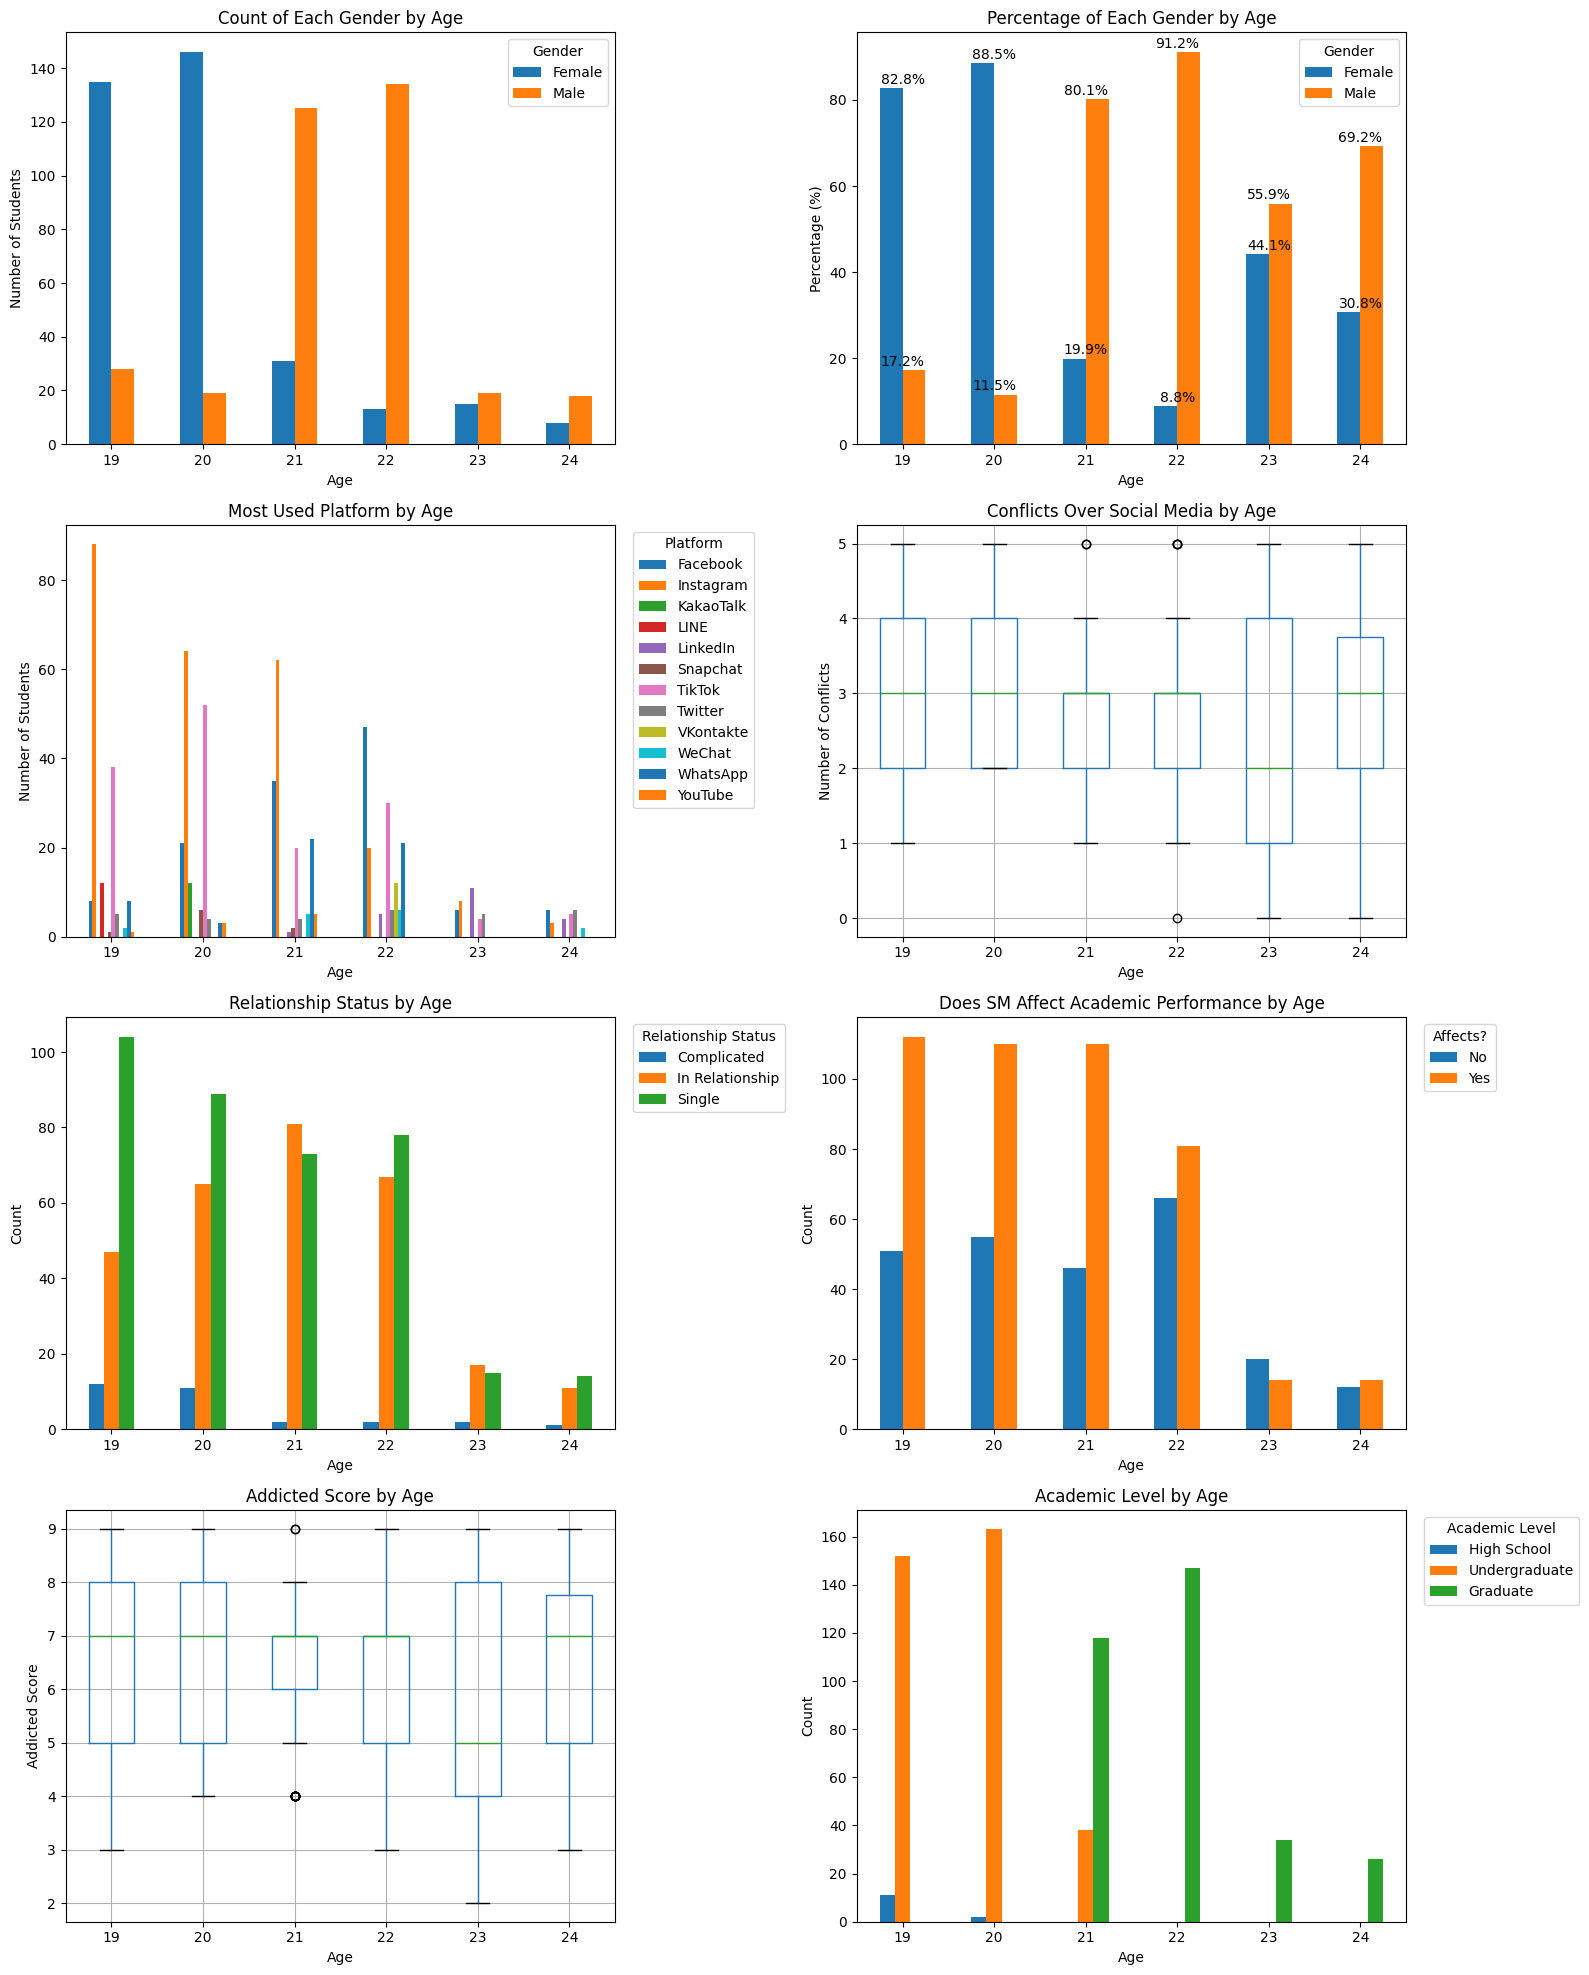

In [60]:
# Identify ages with more than 20 subjects
age_counts = df['Age'].value_counts().sort_index()
valid_ages = age_counts[age_counts > 20].index.tolist()

# Filter the DataFrame to include only those ages
df_age = df[df['Age'].isin(valid_ages)].copy()

# Prepare a 4×2 grid for eight subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Count of each gender by age
gender_ct = pd.crosstab(df_age['Age'], df_age['Gender']).loc[valid_ages]
gender_ct.plot(kind='bar', ax=axes[0, 0], rot=0)
axes[0, 0].set_title('Count of Each Gender by Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Number of Students')
axes[0, 0].legend(title='Gender')

# Percentage of each gender by age
gender_pct = gender_ct.div(gender_ct.sum(axis=1), axis=0) * 100
gender_pct.plot(kind='bar', ax=axes[0, 1], rot=0)
axes[0, 1].set_title('Percentage of Each Gender by Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Percentage (%)')
for age_idx, age in enumerate(valid_ages):
    for gender_idx, pct in enumerate(gender_pct.loc[age].values):
        axes[0, 1].text(age_idx, pct + 1, f"{pct:.1f}%", ha='center')
axes[0, 1].legend(title='Gender')

# Most Used Platform by Age
platform_ct = pd.crosstab(df_age['Age'], df_age['Most Used Platform']).loc[valid_ages]
platform_ct.plot(kind='bar', ax=axes[1, 0], rot=0)
axes[1, 0].set_title('Most Used Platform by Age')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Number of Students')
axes[1, 0].legend(title='Platform', bbox_to_anchor=(1.02, 1), loc='upper left')

# Conflicts Over Social Media by Age
df_age.boxplot(column='Conflicts Over Social Media', by='Age', ax=axes[1, 1])
axes[1, 1].set_title('Conflicts Over Social Media by Age')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Number of Conflicts')
plt.suptitle('')  # Remove pandas’ automatic suptitle

# Relationship Status by Age
rel_ct = pd.crosstab(df_age['Age'], df_age['Relationship Status']).loc[valid_ages]
rel_ct.plot(kind='bar', ax=axes[2, 0], rot=0)
axes[2, 0].set_title('Relationship Status by Age')
axes[2, 0].set_xlabel('Age')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Relationship Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Affects Academic Performance by Age
affect_ct = pd.crosstab(df_age['Age'], df_age['Affects Academic Performance']).loc[valid_ages]
affect_ct.plot(kind='bar', ax=axes[2, 1], rot=0)
axes[2, 1].set_title('Does SM Affect Academic Performance by Age')
axes[2, 1].set_xlabel('Age')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='Affects?', bbox_to_anchor=(1.02, 1), loc='upper left')

# Addicted Score by Age
df_age.boxplot(column='Addicted Score', by='Age', ax=axes[3, 0])
axes[3, 0].set_title('Addicted Score by Age')
axes[3, 0].set_xlabel('Age')
axes[3, 0].set_ylabel('Addicted Score')
plt.suptitle('')

# Academic Level by Age
acad_ct = pd.crosstab(df_age['Age'], df_age['Academic Level']).loc[valid_ages]
acad_ct.plot(kind='bar', ax=axes[3, 1], rot=0)
axes[3, 1].set_title('Academic Level by Age')
axes[3, 1].set_xlabel('Age')
axes[3, 1].set_ylabel('Count')
axes[3, 1].legend(title='Academic Level', bbox_to_anchor=(1.02, 1), loc='upper left')

# Final adjustments
for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=0)

plt.tight_layout()
plt.show()


### By Most Used Platform

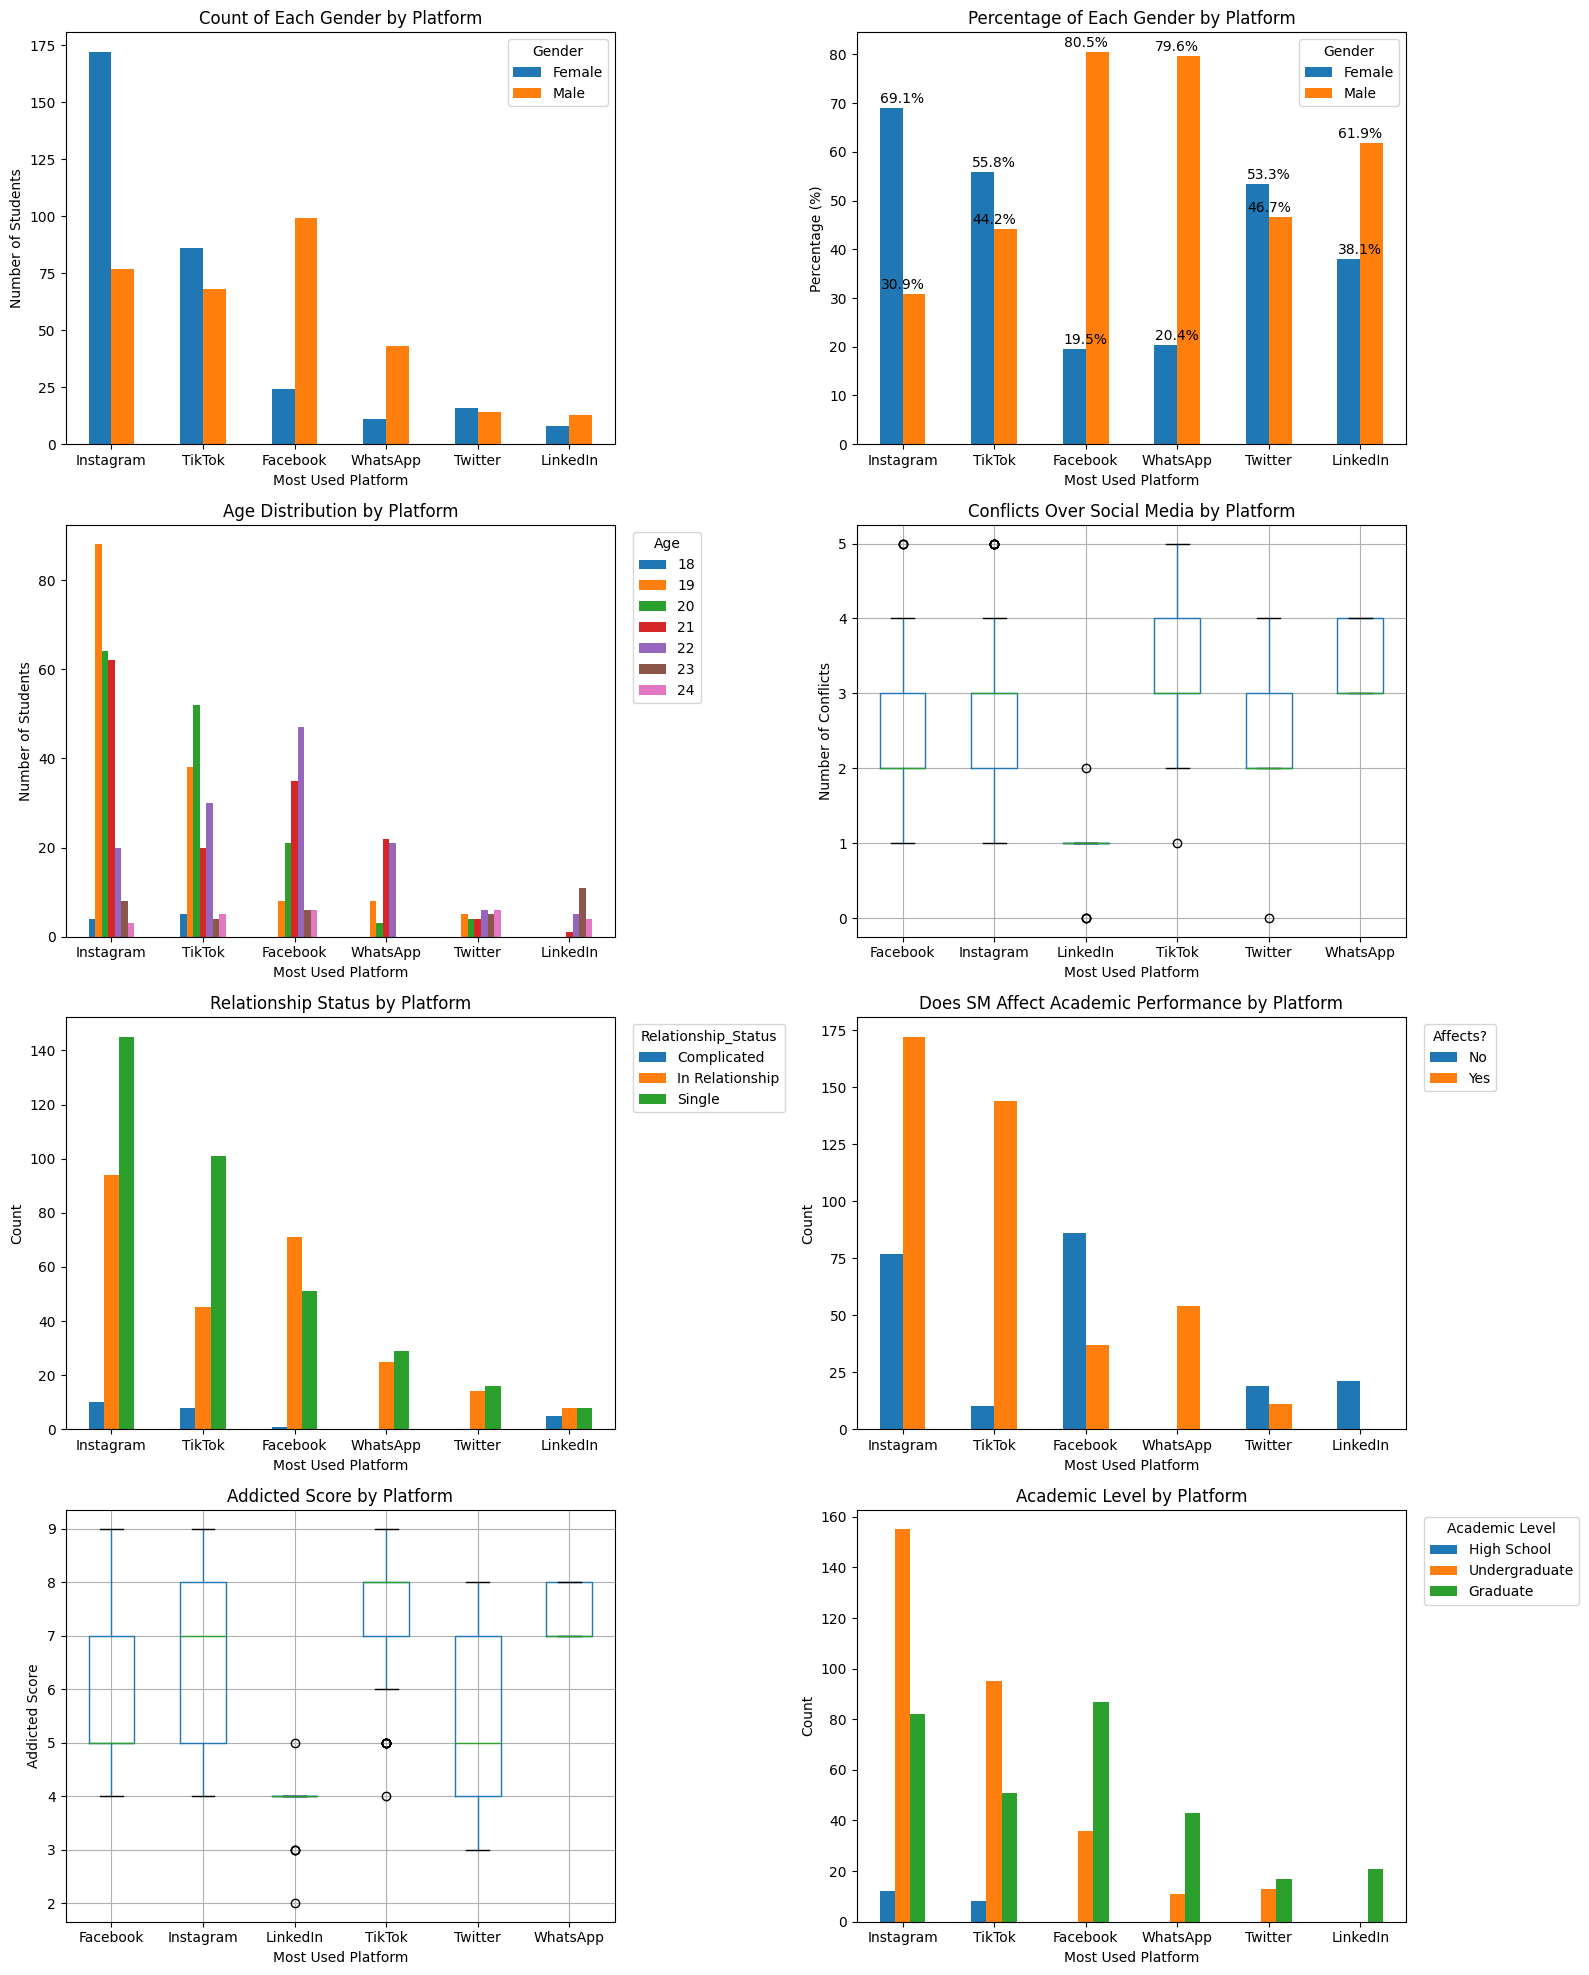

In [61]:
# Identify platforms with more than 20 subjects
platform_counts = df['Most Used Platform'].value_counts()
valid_platforms = platform_counts[platform_counts > 20].index.tolist()

# Filter the DataFrame to include only those platforms
df_platform = df[df['Most Used Platform'].isin(valid_platforms)].copy()

# Prepare a 4×2 grid for eight subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Count of each gender by platform
gender_ct = pd.crosstab(df_platform['Most Used Platform'], df_platform['Gender']).loc[valid_platforms]
gender_ct.plot(kind='bar', ax=axes[0, 0], rot=0)
axes[0, 0].set_title('Count of Each Gender by Platform')
axes[0, 0].set_xlabel('Most Used Platform')
axes[0, 0].set_ylabel('Number of Students')
axes[0, 0].legend(title='Gender')

# Percentage of each gender by platform
gender_pct = gender_ct.div(gender_ct.sum(axis=1), axis=0) * 100
gender_pct.plot(kind='bar', ax=axes[0, 1], rot=0)
axes[0, 1].set_title('Percentage of Each Gender by Platform')
axes[0, 1].set_xlabel('Most Used Platform')
axes[0, 1].set_ylabel('Percentage (%)')
for plat_idx, plat in enumerate(valid_platforms):
    for gender_idx, pct in enumerate(gender_pct.loc[plat].values):
        axes[0, 1].text(plat_idx, pct + 1, f"{pct:.1f}%", ha='center')
axes[0, 1].legend(title='Gender')

# Age distribution by platform (bar plot)
age_ct = pd.crosstab(df_platform['Most Used Platform'], df_platform['Age']).loc[valid_platforms]
age_ct.plot(kind='bar', ax=axes[1, 0], stacked=False)
axes[1, 0].set_title('Age Distribution by Platform')
axes[1, 0].set_xlabel('Most Used Platform')
axes[1, 0].set_ylabel('Number of Students')
axes[1, 0].legend(title='Age', bbox_to_anchor=(1.02, 1), loc='upper left')

# (4) Conflicts Over Social Media by platform (boxplot)
df_platform.boxplot(column='Conflicts Over Social Media', by='Most Used Platform', ax=axes[1, 1])
axes[1, 1].set_title('Conflicts Over Social Media by Platform')
axes[1, 1].set_xlabel('Most Used Platform')
axes[1, 1].set_ylabel('Number of Conflicts')
plt.suptitle('')  # Remove pandas’ automatic suptitle

# Relationship Status by platform
rel_ct = pd.crosstab(df_platform['Most Used Platform'], df_platform['Relationship Status']).loc[valid_platforms]
rel_ct.plot(kind='bar', ax=axes[2, 0], rot=0)
axes[2, 0].set_title('Relationship Status by Platform')
axes[2, 0].set_xlabel('Most Used Platform')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Relationship_Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Affects Academic Performance by platform
affect_ct = pd.crosstab(df_platform['Most Used Platform'], df_platform['Affects Academic Performance']).loc[valid_platforms]
affect_ct.plot(kind='bar', ax=axes[2, 1], rot=0)
axes[2, 1].set_title('Does SM Affect Academic Performance by Platform')
axes[2, 1].set_xlabel('Most Used Platform')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='Affects?', bbox_to_anchor=(1.02, 1), loc='upper left')

# Addicted Score by platform (boxplot)
df_platform.boxplot(column='Addicted Score', by='Most Used Platform', ax=axes[3, 0])
axes[3, 0].set_title('Addicted Score by Platform')
axes[3, 0].set_xlabel('Most Used Platform')
axes[3, 0].set_ylabel('Addicted Score')
plt.suptitle('')  # Remove pandas’ automatic suptitle

# Academic Level by platform
acad_ct = pd.crosstab(df_platform['Most Used Platform'], df_platform['Academic Level']).loc[valid_platforms]
acad_ct.plot(kind='bar', ax=axes[3, 1], rot=0)
axes[3, 1].set_title('Academic Level by Platform')
axes[3, 1].set_xlabel('Most Used Platform')
axes[3, 1].set_ylabel('Count')
axes[3, 1].legend(title='Academic Level', bbox_to_anchor=(1.02, 1), loc='upper left')

# Final adjustments
for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=0)

plt.tight_layout()
plt.show()


### By Mental Health

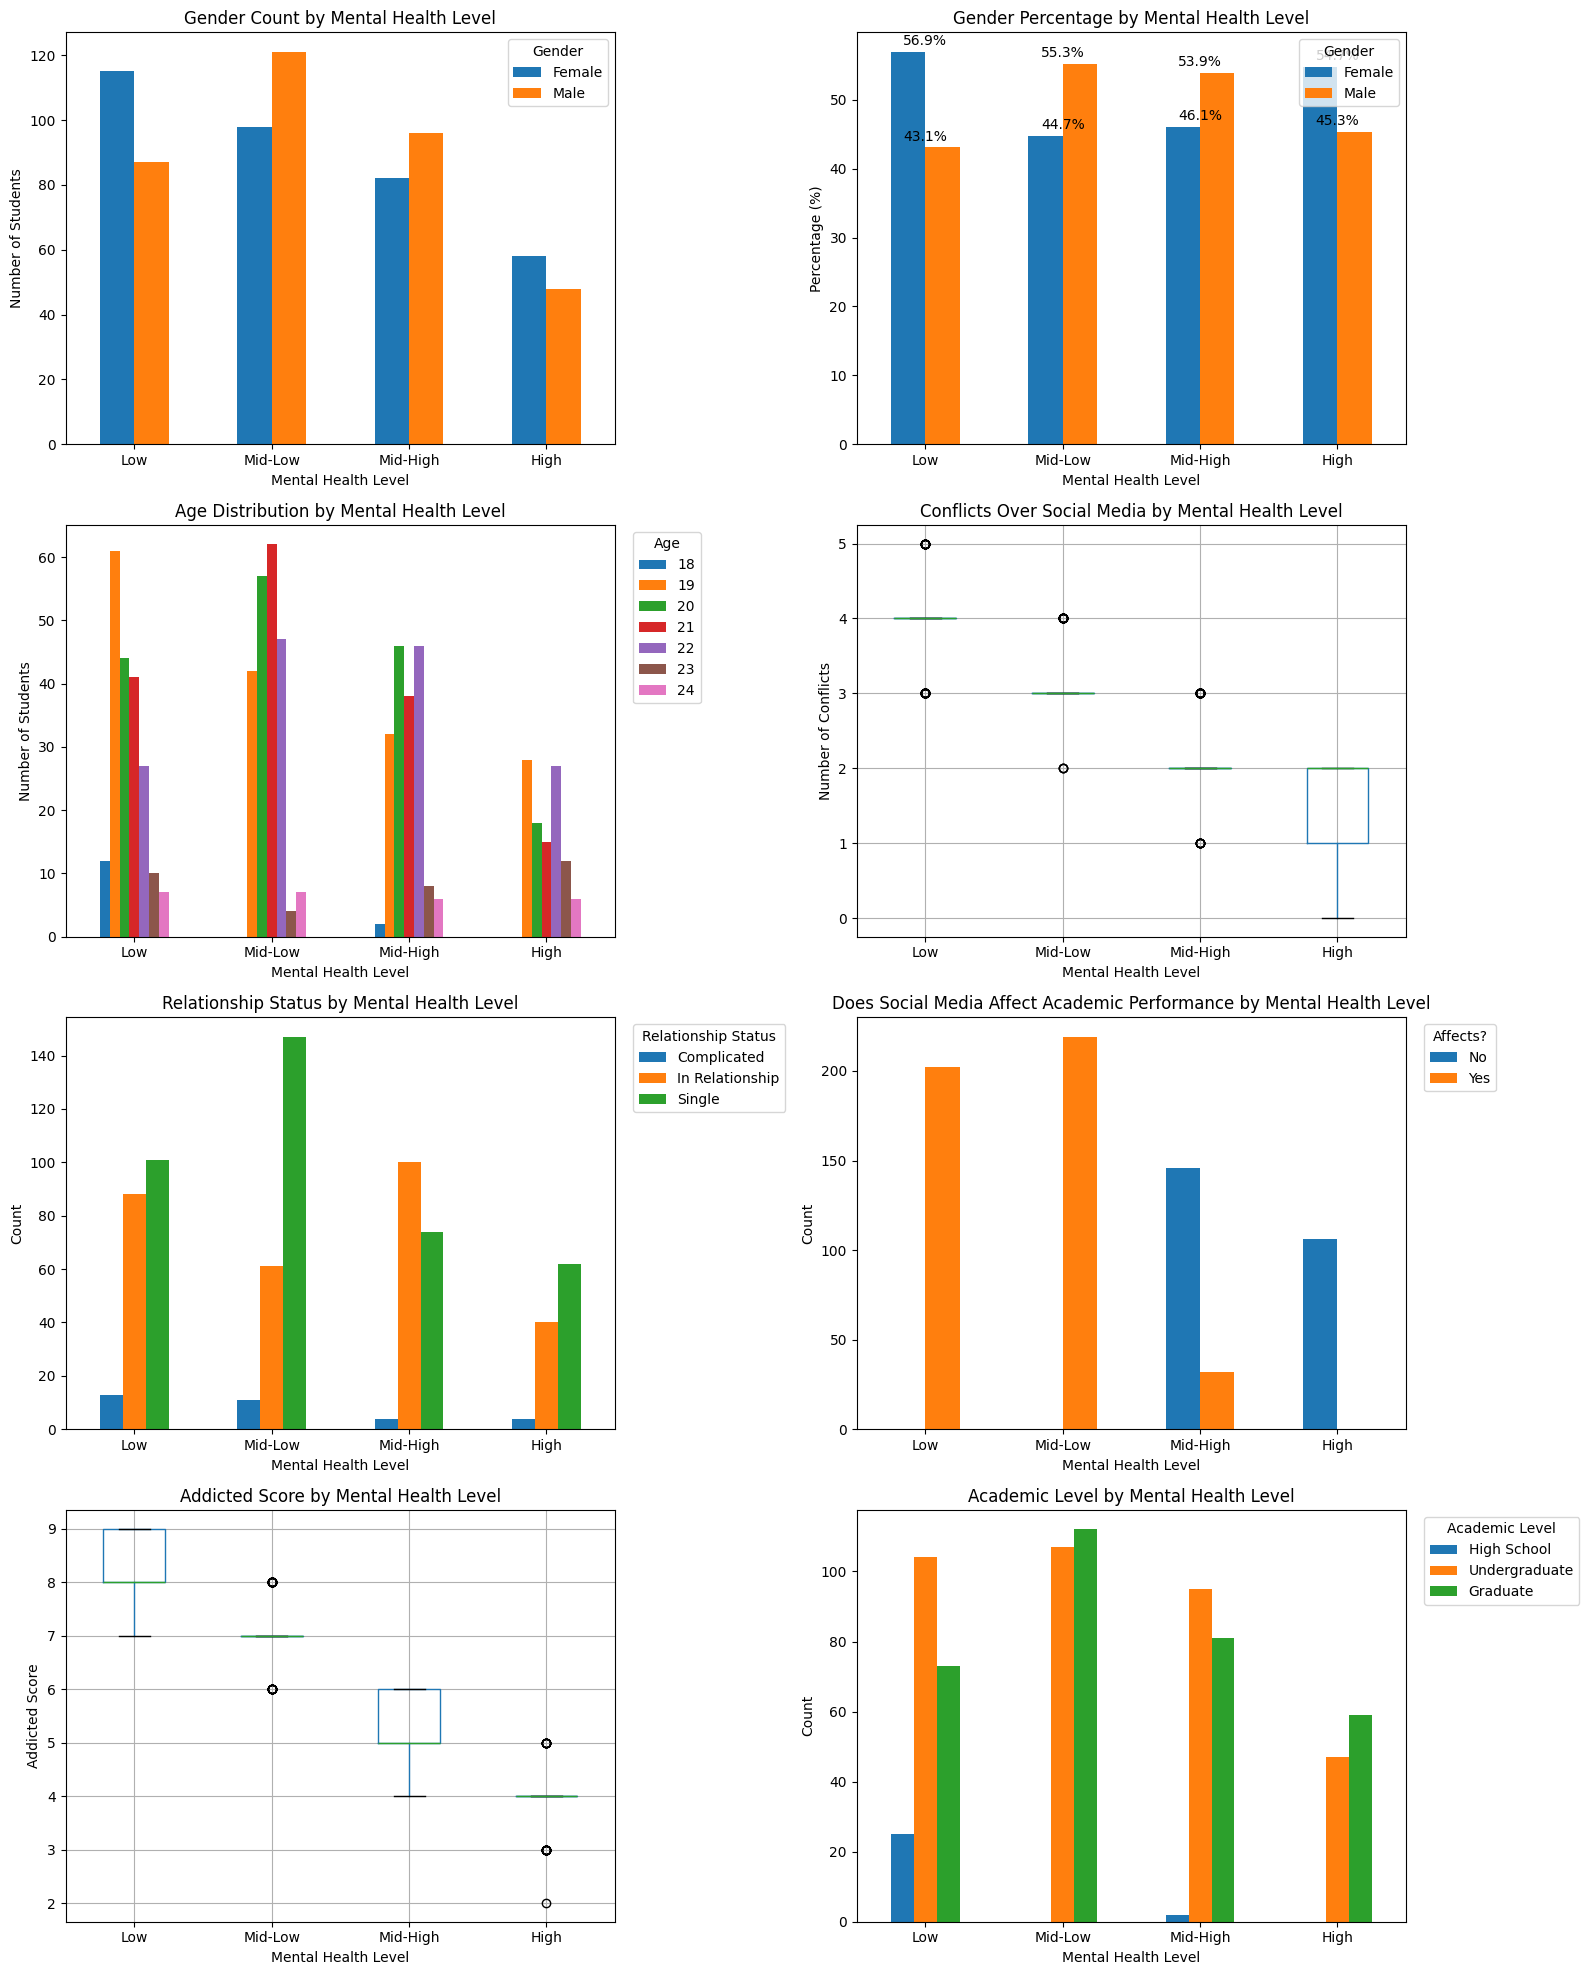

In [62]:
# Create Mental Health Score categories (quartiles)
df['MH_Category'] = pd.qcut(df['Mental Health Score'], 4, labels=["Low", "Mid-Low", "Mid-High", "High"])

# Prepare a 4×2 grid for eight subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Count of each gender by mental health category
gender_ct = pd.crosstab(df['MH_Category'], df['Gender'])
gender_ct.plot(kind='bar', ax=axes[0, 0], rot=0)
axes[0, 0].set_title('Gender Count by Mental Health Level')
axes[0, 0].set_xlabel('Mental Health Level')
axes[0, 0].set_ylabel('Number of Students')
axes[0, 0].legend(title='Gender')

# Percentage of each gender by mental health category
gender_pct = gender_ct.div(gender_ct.sum(axis=1), axis=0) * 100
gender_pct.plot(kind='bar', ax=axes[0, 1], rot=0)
axes[0, 1].set_title('Gender Percentage by Mental Health Level')
axes[0, 1].set_xlabel('Mental Health Level')
axes[0, 1].set_ylabel('Percentage (%)')
for cat_idx, cat in enumerate(gender_pct.index):
    for gender_idx, pct in enumerate(gender_pct.loc[cat].values):
        axes[0, 1].text(cat_idx, pct + 1, f"{pct:.1f}%", ha='center')
axes[0, 1].legend(title='Gender')

# Age distribution by mental health category (bar plot)
age_ct = pd.crosstab(df['MH_Category'], df['Age'])
age_ct.plot(kind='bar', ax=axes[1, 0], stacked=False)
axes[1, 0].set_title('Age Distribution by Mental Health Level')
axes[1, 0].set_xlabel('Mental Health Level')
axes[1, 0].set_ylabel('Number of Students')
axes[1, 0].legend(title='Age', bbox_to_anchor=(1.02, 1), loc='upper left')

# Conflicts Over Social Media by mental health category (boxplot)
df.boxplot(column='Conflicts Over Social Media', by='MH_Category', ax=axes[1, 1])
axes[1, 1].set_title('Conflicts Over Social Media by Mental Health Level')
axes[1, 1].set_xlabel('Mental Health Level')
axes[1, 1].set_ylabel('Number of Conflicts')
plt.suptitle('')  # Remove pandas’ automatic suptitle

# Relationship Status by mental health category
rel_ct = pd.crosstab(df['MH_Category'], df['Relationship Status'])
rel_ct.plot(kind='bar', ax=axes[2, 0], rot=0)
axes[2, 0].set_title('Relationship Status by Mental Health Level')
axes[2, 0].set_xlabel('Mental Health Level')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Relationship Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Affects Academic Performance by mental health category
affect_ct = pd.crosstab(df['MH_Category'], df['Affects Academic Performance'])
affect_ct.plot(kind='bar', ax=axes[2, 1], rot=0)
axes[2, 1].set_title('Does Social Media Affect Academic Performance by Mental Health Level')
axes[2, 1].set_xlabel('Mental Health Level')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='Affects?', bbox_to_anchor=(1.02, 1), loc='upper left')

# Addicted Score by mental health category (boxplot)
df.boxplot(column='Addicted Score', by='MH_Category', ax=axes[3, 0])
axes[3, 0].set_title('Addicted Score by Mental Health Level')
axes[3, 0].set_xlabel('Mental Health Level')
axes[3, 0].set_ylabel('Addicted Score')
plt.suptitle('')  # Remove pandas’ automatic suptitle

# Academic Level by mental health category
acad_ct = pd.crosstab(df['MH_Category'], df['Academic Level'])
acad_ct.plot(kind='bar', ax=axes[3, 1], rot=0)
axes[3, 1].set_title('Academic Level by Mental Health Level')
axes[3, 1].set_xlabel('Mental Health Level')
axes[3, 1].set_ylabel('Count')
axes[3, 1].legend(title='Academic Level', bbox_to_anchor=(1.02, 1), loc='upper left')

# Final adjustments
for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=0)

plt.tight_layout()
plt.show()


## Checking deeper relationships

### Does personal status consisting of age, gender, sleep hours, and marital status affect the addiction score?

We use multiple linear regression to check that

In [77]:
# Keep only relevant columns and drop missing values
data = df[['Age', 'Gender', 'Sleep Hours Per Night', 'Relationship Status', 'Addicted Score']].dropna()

# Encode categorical variables
data['Gender_encoded'] = LabelEncoder().fit_transform(data['Gender'])
data['Relationship_encoded'] = LabelEncoder().fit_transform(data['Relationship Status'])

# Define independent variables and dependent variable
X = data[['Age', 'Gender_encoded', 'Sleep Hours Per Night', 'Relationship_encoded']]
y = data['Addicted Score']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Create a summary table
summary_df = pd.DataFrame({
    'Variable': model.params.index,
    'Coefficient': np.round(model.params.values, 3),
    'P-Value': np.round(model.pvalues.values, 4)
})
summary_df['Significant (p < 0.05)'] = summary_df['P-Value'] < 0.05


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Addicted Score   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     263.4
Date:                Sat, 26 Jul 2025   Prob (F-statistic):          5.35e-138
Time:                        14:27:39   Log-Likelihood:                -1001.8
No. Observations:                 705   AIC:                             2014.
Df Residuals:                     700   BIC:                             2036.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    15.28

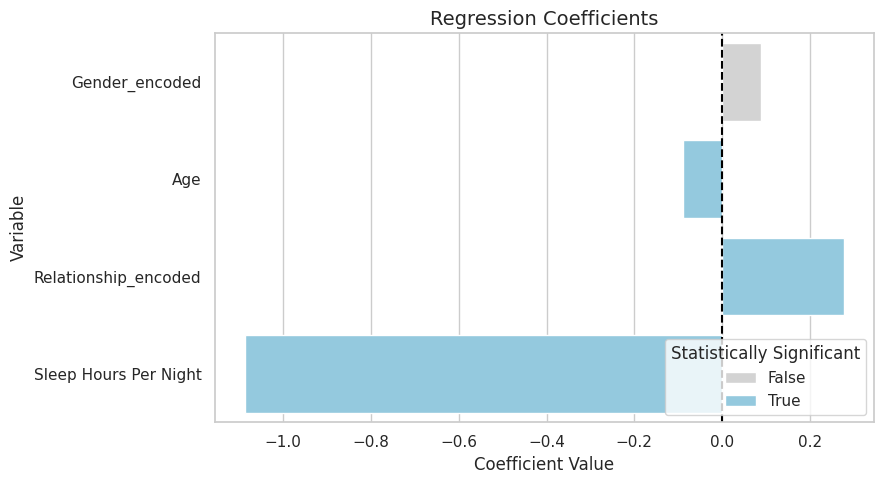

In [78]:
# Prepare the data (excluding the constant)
plot_df = summary_df[summary_df['Variable'] != 'const'].copy()
plot_df['abs_coef'] = plot_df['Coefficient'].abs()
plot_df = plot_df.sort_values(by='abs_coef', ascending=True)

# Set Seaborn style
sns.set(style="whitegrid")

# Create horizontal bar plot with hue for significance
plt.figure(figsize=(9, 5))
ax = sns.barplot(
    x='Coefficient',
    y='Variable',
    hue='Significant (p < 0.05)',
    data=plot_df,
    dodge=False,
    palette={True: 'skyblue', False: 'lightgrey'}
)

# Plot formatting
plt.axvline(0, color='black', linestyle='--')
plt.title("Regression Coefficients", fontsize=14)
plt.xlabel("Coefficient Value")
plt.ylabel("Variable")
plt.legend(title="Statistically Significant", loc='lower right')
plt.tight_layout()
plt.show()


 **Regulation (Lasso)**

In [87]:
#  Same preprocessing as before
X = data[['Age', 'Gender_encoded', 'Sleep Hours Per Night', 'Relationship_encoded']]
y = data['Addicted Score']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run LassoCV to find the best alpha
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_scaled, y)

# Get best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha chosen by cross-validation: {best_alpha:.4f}")


Best alpha chosen by cross-validation: 0.2120


In [90]:
# Select and clean relevant columns
data = df[['Age', 'Gender', 'Sleep Hours Per Night', 'Relationship Status', 'Addicted Score']].dropna()

# Encode categorical variables
data['Gender_encoded'] = LabelEncoder().fit_transform(data['Gender'])
data['Relationship_encoded'] = LabelEncoder().fit_transform(data['Relationship Status'])

# Prepare X and y
X = data[['Age', 'Gender_encoded', 'Sleep Hours Per Night', 'Relationship_encoded']]
y = data['Addicted Score']

# Standardize features (important for regularized regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit Lasso Regression
lasso = Lasso(alpha=0.2120)  # You can adjust alpha (regularization strength)
lasso.fit(X_train, y_train)

# Predict and evaluate
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Show results
coefficients = pd.DataFrame({
    'Feature': ['Age', 'Gender', 'Sleep Hours', 'Relationship Status'],
    'Coefficient': lasso.coef_
})

print("Lasso Regression Coefficients:")
display(coefficients)
print(f"\nR² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.2f}")


Lasso Regression Coefficients:


,Feature,Coefficient
0,Age,-0.000000
1,Gender,-0.000000
2,Sleep Hours,-0.985644
3,Relationship Status,0.000000



R² Score: 0.553
Mean Squared Error: 1.12


### Does the ratio between average daily use and hours of sleep correlate with the addiction score?

To better understand the impact of screen habits on addiction levels, we created a new variable called **Usage_to_Sleep_Ratio**, which measures the proportion of average daily screen time relative to sleep hours.

We then calculated the correlation between this ratio and the Addicted Score, revealing how disproportionate usage (i.e., using screens far more than sleeping) may be linked to higher levels of addiction.

To visualize this relationship, we plotted three types of regression models:
- A **linear regression line**, assuming a straight-line relationship.
- A **polynomial regression curve** (order 2), capturing potential curvature.
- A **LOWESS smoothed curve**, offering a flexible, non-parametric fit.

This analysis is valuable because it goes beyond raw usage or sleep hours, and focuses instead on their balance.

In [91]:
# Make sure columns are present and clean
df_clean = df[['Avg Daily Usage Hours', 'Sleep Hours Per Night', 'Addicted Score']].dropna()

# Create the ratio column
df_clean['Usage_to_Sleep_Ratio'] = df_clean['Avg Daily Usage Hours'] / df_clean['Sleep Hours Per Night']

# Calculate correlation
correlation = df_clean['Usage_to_Sleep_Ratio'].corr(df_clean['Addicted Score'])

print(f"Correlation between Usage/Sleep Ratio and Addiction Score: {correlation:.3f}")


Correlation between Usage/Sleep Ratio and Addiction Score: 0.817


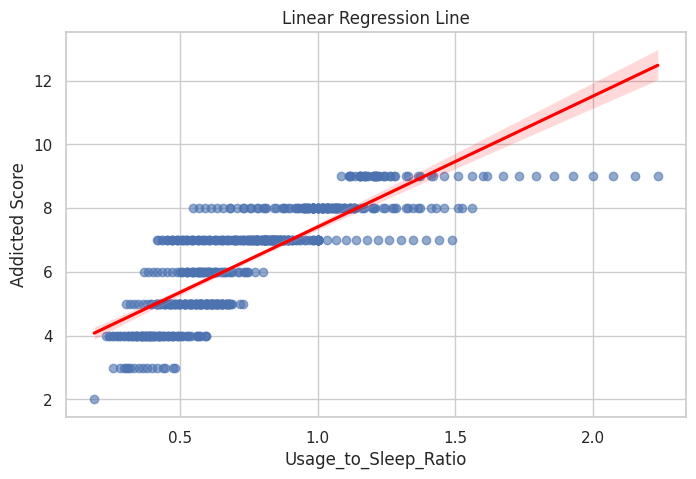

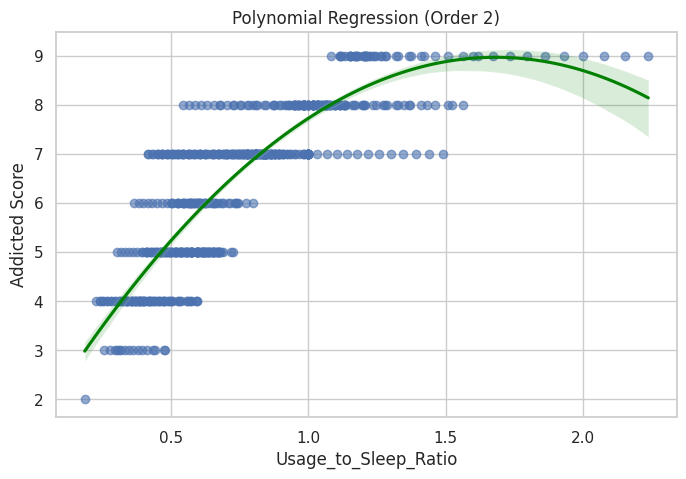

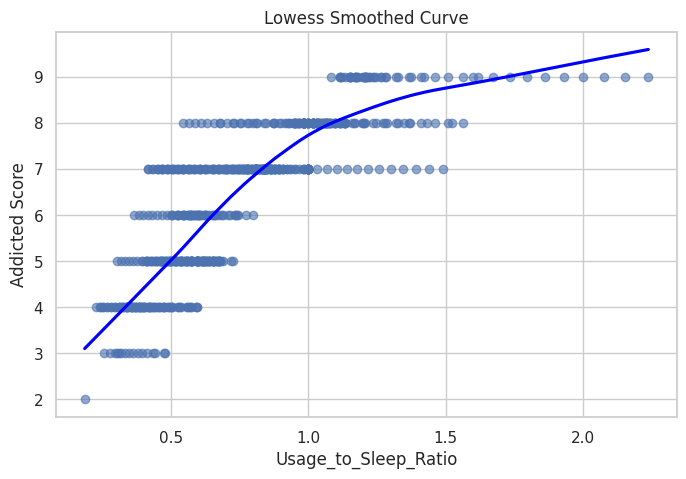

In [92]:
# Create the column Usage_to_Sleep_Ratio
df['Usage_to_Sleep_Ratio'] = df['Avg Daily Usage Hours'] / df['Sleep Hours Per Night']

# Remove rows with missing values
df_clean = df.dropna(subset=['Usage_to_Sleep_Ratio', 'Addicted Score'])

# Basic plot (linear regression)
plt.figure(figsize=(8, 5))
sns.regplot(
    x='Usage_to_Sleep_Ratio',
    y='Addicted Score',
    data=df_clean,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title("Linear Regression Line")
plt.show()

# Plot with polynomial regression line (order 2)
plt.figure(figsize=(8, 5))
sns.regplot(
    x='Usage_to_Sleep_Ratio',
    y='Addicted Score',
    data=df_clean,
    order=2,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'green'}
)
plt.title("Polynomial Regression (Order 2)")
plt.show()

# Plot with flexible curve (LOWESS smoothing)
plt.figure(figsize=(8, 5))
sns.regplot(
    x='Usage_to_Sleep_Ratio',
    y='Addicted Score',
    data=df_clean,
    lowess=True,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'blue'}
)
plt.title("Lowess Smoothed Curve")
plt.show()


In [93]:
X = df_clean['Usage_to_Sleep_Ratio']
y = df_clean['Addicted Score']

# Linear regression
X1 = sm.add_constant(X)
model1 = sm.OLS(y, X1).fit()

# Polynomial regression (order 2)
X2 = sm.add_constant(np.column_stack((X, X**2)))
model2 = sm.OLS(y, X2).fit()

# Polynomial regression (order 3)
X3 = sm.add_constant(np.column_stack((X, X**2, X**3)))
model3 = sm.OLS(y, X3).fit()

# Print results
print("Linear Regression:")
print(f"  R² = {model1.rsquared:.3f}, AIC = {model1.aic:.2f}")

print("\nPolynomial Regression (Order 2):")
print(f"  R² = {model2.rsquared:.3f}, AIC = {model2.aic:.2f}")

print("\nPolynomial Regression (Order 3):")
print(f"  R² = {model3.rsquared:.3f}, AIC = {model3.aic:.2f}")


Linear Regression:
  R² = 0.668, AIC = 1878.60

Polynomial Regression (Order 2):
  R² = 0.741, AIC = 1705.85

Polynomial Regression (Order 3):
  R² = 0.742, AIC = 1705.24


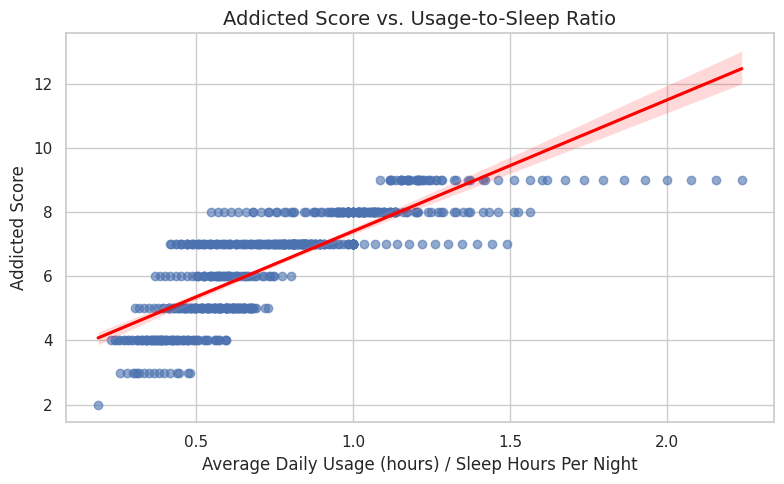

In [94]:
# Plot the scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(
    x='Usage_to_Sleep_Ratio',
    y='Addicted Score',
    data=df_clean,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

plt.title("Addicted Score vs. Usage-to-Sleep Ratio", fontsize=14)
plt.xlabel("Average Daily Usage (hours) / Sleep Hours Per Night")
plt.ylabel("Addicted Score")
plt.tight_layout()
plt.show()


Our analysis revealed a strong positive correlation (r = 0.817) between the ratio of average daily social media usage to hours of sleep and students' Addicted Score. This suggests that individuals who report spending more time on social media in relation to how much they sleep also tend to report higher levels of social media addiction. While this does not imply a causal relationship, it highlights a meaningful association that may reflect behavioral patterns worth further exploration. These findings may support the idea that balancing media use and sleep could be important in understanding students' online habits and their potential link to addictive behaviors.

### Does health status, comprising mental health, sleep duration, interpersonal conflicts, and academic impact, affect the addiction score?

Working with 705 complete records


/tmp/ipython-input-96-2202107527.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({"Yes": 1, "No": 0, "yes": 1, "no": 0})


,Addicted Score,Mental Health Score,Sleep Hours Per Night,Conflicts Over Social Media,Affects Academic Performance
count,705.000000,705.000000,705.000000,705.000000,705.000000
mean,6.436879,6.226950,6.868936,2.849645,0.642553
std,1.587165,1.105055,1.126848,0.957968,0.479588
min,2.000000,4.000000,3.800000,0.000000,0.000000
25%,5.000000,5.000000,6.000000,2.000000,0.000000
50%,7.000000,6.000000,6.900000,3.000000,1.000000
75%,8.000000,7.000000,7.700000,4.000000,1.000000
max,9.000000,9.000000,9.600000,5.000000,1.000000



Correlations with Addiction Score:
 Addicted Score                  1.000000
Conflicts Over Social Media     0.933586
Affects Academic Performance    0.866049
Sleep Hours Per Night          -0.764858
Mental Health Score            -0.945051
Name: Addicted Score, dtype: float64


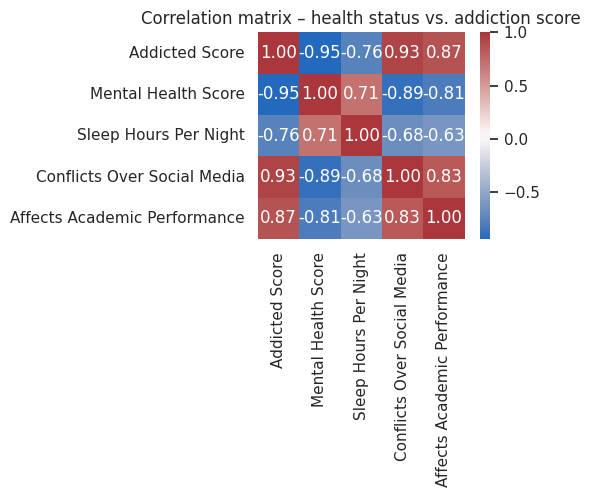

                            OLS Regression Results                            
Dep. Variable:         Addicted Score   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     3533.
Date:                Sat, 26 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:38:04   Log-Likelihood:                -249.19
No. Observations:                 705   AIC:                             508.4
Df Residuals:                     700   BIC:                             531.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

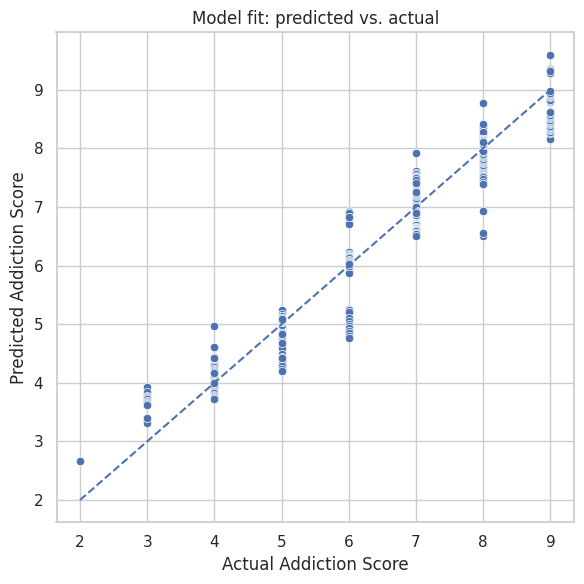

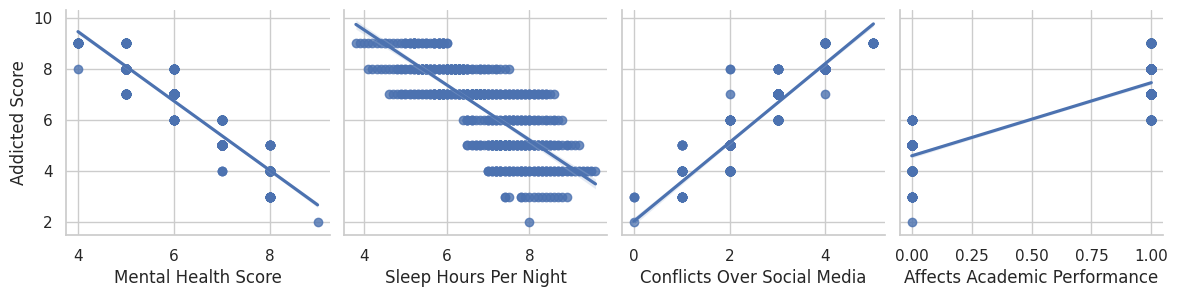


Weighted Health Index model:

                             OLS Regression Results                            
Dep. Variable:     Q("Addicted Score")   R-squared:                       0.953
Model:                             OLS   Adj. R-squared:                  0.953
Method:                  Least Squares   F-statistic:                 1.419e+04
Date:                 Sat, 26 Jul 2025   Prob (F-statistic):               0.00
Time:                         14:38:05   Log-Likelihood:                -249.19
No. Observations:                  705   AIC:                             502.4
Df Residuals:                      703   BIC:                             511.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Interce

In [96]:
# 1. Select and prepare relevant columns
health_cols = {
    "addiction" : "Addicted Score",
    "mental"    : "Mental Health Score",
    "sleep"     : "Sleep Hours Per Night",
    "conflict"  : "Conflicts Over Social Media",
    "academic"  : "Affects Academic Performance"
}

df_health = df[[health_cols[c] for c in health_cols]].dropna()

# Convert Yes/No columns to 1/0
yes_no_cols = ["Conflicts Over Social Media", "Affects Academic Performance"]
df_health[yes_no_cols] = (
    df_health[yes_no_cols]
    .replace({"Yes": 1, "No": 0, "yes": 1, "no": 0})
    .astype(int)
)

print(f"Working with {df_health.shape[0]} complete records")

# Descriptive stats & correlations
display(df_health.describe())

corr = df_health.corr(numeric_only=True)
print("\nCorrelations with Addiction Score:\n",
      corr["Addicted Score"].sort_values(ascending=False))

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", square=True)
plt.title("Correlation matrix – health status vs. addiction score")
plt.tight_layout()
plt.show()

# Standardize predictors
from sklearn.preprocessing import StandardScaler

X = df_health.drop(columns="Addicted Score")
y = df_health["Addicted Score"]

scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

# Multiple linear regression
import statsmodels.api as sm

X_sm = sm.add_constant(X_scaled)
ols_model = sm.OLS(y, X_sm).fit()
print(ols_model.summary())

# Diagnostic plot – predicted vs. actual
y_pred = ols_model.predict(X_sm)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle="--")
plt.xlabel("Actual Addiction Score")
plt.ylabel("Predicted Addiction Score")
plt.title("Model fit: predicted vs. actual")
plt.grid(True)
plt.tight_layout()
plt.show()

# Pairwise relationships (optional)
sns.pairplot(
    df_health,
    y_vars="Addicted Score",
    x_vars=[
        "Mental Health Score",
        "Sleep Hours Per Night",
        "Conflicts Over Social Media",
        "Affects Academic Performance"
    ],
    kind="reg",
    diag_kind="hist",
    height=3
)
plt.show()

# Weighted Health Index
# Use coefficients from the multiple regression
coefficients = {
    "Mental Health Score": -0.6665,
    "Sleep Hours Per Night": -0.2315,
    "Conflicts Over Social Media": 0.5022,
    "Affects Academic Performance": 0.2719
}

df_health["Health_Index"] = sum(
    X_scaled[col] * coef for col, coef in coefficients.items()
)

import statsmodels.formula.api as smf
index_model = smf.ols('Q("Addicted Score") ~ Health_Index', data=df_health).fit()
print("\nWeighted Health Index model:\n")
print(index_model.summary())


In [97]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Addicted Score   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     3533.
Date:                Sat, 26 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:42:24   Log-Likelihood:                -249.19
No. Observations:                 705   AIC:                             508.4
Df Residuals:                     700   BIC:                             531.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            6.4369      0.013    494.258      0.000       6.411       6.462
Mental Health Score             -0.6665      0.031    -21.261      0.000      -0.728      -0.605
Sleep Hours Per Night           -0.2315      0.019    -12.398      0.000      -0.268      -0.195
Conflicts Over Social Media      0.5022      0.032     15.683      0.000       0.439       0.565
Affects Academic Performance     0.2719      0.024     11.141      0.000       0.224       0.320
==============================================================================
Omnibus:                       61.737   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.635
Skew:                           0.500   Prob(JB):                     4.77e-31
Kurtosis:                       4.938   Cond. No.                         5.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This analysis investigates how several behavioral and mental health factors contribute to self-reported levels of screen addiction. Specifically, we examine the influence of:

- **Mental Health Score**
- **Sleep Hours Per Night**
- **Conflicts Over Social Media**
- **Impact on Academic Performance**

After cleaning the data and standardizing the predictors, we fit a multiple linear regression model to estimate the effect of each factor on the Addicted Score. The model reveals that:

- **Worse mental health** and **fewer hours of sleep** are significantly associated with higher addiction scores.
- **Frequent conflicts over social media** and **reported academic disruption** also contribute positively to addiction, but with smaller coefficients.

These results support the hypothesis that addiction is not solely a function of screen time, but also reflects deeper psychological and social dimensions.

To streamline this insight, we constructed a **Weighted Health Index** — a composite score based on the regression coefficients — and tested its ability to predict addiction scores on its own. The resulting model showed a strong, statistically significant relationship between this index and addiction, indicating that:

A single, well-calibrated health index may serve as an effective summary predictor for screen-related addictive behaviors.

This approach may have practical implications for early detection, intervention design, or mental health monitoring tools.


## Respondents Consistency

/tmp/ipython-input-99-818160207.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Usage Category', y='Addicted Score', palette='plasma')


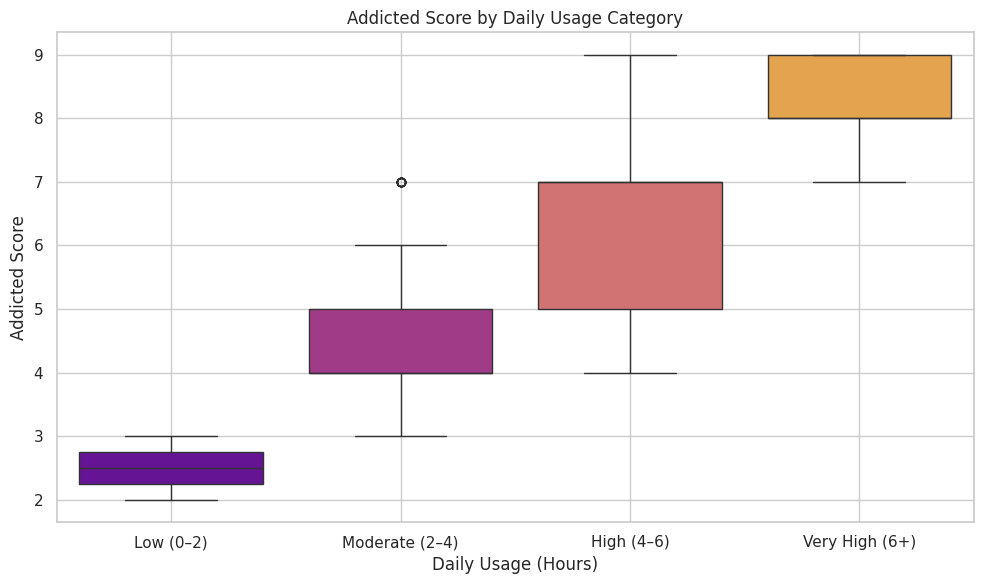

In [99]:
# Method 2: Usage vs. Addicted Score (Boxplot)

# Categorize usage hours into bins
df['Usage Category'] = pd.cut(df['Avg Daily Usage Hours'],
                              bins=[0, 2, 4, 6, 10],
                              labels=['Low (0–2)', 'Moderate (2–4)', 'High (4–6)', 'Very High (6+)'])

# Create boxplot of Addicted Score by usage category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Usage Category', y='Addicted Score', palette='plasma')
plt.title("Addicted Score by Daily Usage Category")
plt.xlabel("Daily Usage (Hours)")
plt.ylabel("Addicted Score")
plt.grid(True)
plt.tight_layout()
plt.show()

### Underestimate

Method 1- Cronbach’s Alpha



In [98]:
# method 1 -  Cronbach’s Alpha (Internal Consistency)


# Simulate addiction-related items using available relevant columns
df_alpha = df[['Addicted Score', 'Avg Daily Usage Hours', 'Conflicts Over Social Media']].copy()
df_alpha.columns = ['Q1', 'Q2', 'Q3']  # Simulated item names

# Manual Cronbach's Alpha calculation
item_scores = df_alpha.to_numpy()
item_variances = item_scores.var(axis=0, ddof=1)
total_scores = item_scores.sum(axis=1)
total_variance = total_scores.var(ddof=1)

n_items = item_scores.shape[1]
cronbach_alpha = (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)

print(f"Cronbach's Alpha: {cronbach_alpha:.3f}")


Cronbach's Alpha: 0.926


Method 3 - Logical inconsistencies in respondents' answers throughout the questionnaire

In [100]:
# Academic

# Profile 1 – Examination of the reliability of the academic variable

# Usage hours > 5  | Means that the subject is spanding more tome above the average in soical media.
# Addicted score >6 | Means that the subject self-reported that he is addicte
# Affrctes academic preformance == no | Means  that although the respondent self-reports above-average use and addiction,
#                                       he indicated that her academic performance is not affected.


# # our thresholds
# con1 = df['Avg Daily Usage Hours'] >= 5
# con2 = df['Addicted Score'] >=6
# con3 = df['Affects Academic Performance'] == 'No'

# by avg thresholds
con1 = df['Avg Daily Usage Hours'] > 4.9
con2 = df['Addicted Score'] > 6.4
con3 = df['Affects Academic Performance'] == 'No'

# Combine conditions
df['Denial Profile'] = con1&con2&con3

# Count and percentage
denial_count = df['Denial Profile'].sum()
total_count = len(df)
denial_percent = denial_count / total_count * 100

print(f"Number of respondents with contradiction profile: {denial_count}")
print(f"Percentage of total respondents: {denial_percent:.2f}%")


Number of respondents with contradiction profile: 0
Percentage of total respondents: 0.00%


In [101]:
# Addicted

# Profile 2 - Examination of the reliability of the Addicted score variable

# Affects Academic Performance = Yes | Means that the subjet self reported that his academic preformance is affected.
# Avg Daily Usage Hours >5 | Means that the subject is spanding more tome above the average in soical media.
# Sleep Hours Per Night <7 | Means that the sucjet sleep time is below average.
# Addicted Score < 6 | Means that the subject self reported that he is not addicted to social media despit
#                       his academic preformance damaged, spanding above average time in social media and isnt sleep enough.

# our threshodlds
# con4 = df['Addicted Score'] <6
# con5= df['Affects Academic Performance'] == 'Yes'
# con6 = df['Avg Daily Usage Hours'] >5
# con7= df['Sleep Hours Per Night'] <7

# avg thresholds
con4 = df['Addicted Score'] < 6.4
con5= df['Affects Academic Performance'] == 'Yes'
con6 = df['Avg Daily Usage Hours'] > 4.9
con7= df['Sleep Hours Per Night'] < 6.86

# Combine conditions
df['Denial Profile 2'] = con4&con5&con6&con7

# Count and percentage
denial_count = df['Denial Profile 2'].sum()
total_count = len(df)
denial_percent = denial_count / total_count * 100

print(f"Number of respondents with contradiction profile: {denial_count}")
print(f"Percentage of total respondents: {denial_percent:.2f}%")


Number of respondents with contradiction profile: 4
Percentage of total respondents: 0.57%


In [102]:
# Mental health

# Profile 3- Examination of the reliability of the Mental Health Score variable

# Affects Academic Performance == yes | means that the subjects' academoc preformance is affected.
# Avg Daily Usage Hours > 5 | means that the subject spand time in social media above the average.
# Sleep Hours Per Night < 7 | means that the subject is not sleeping enough.
# Conflicts Over Social Media > 3 | means that the subject tend to argue over social media above average.
# Mental Health Score > 6 | means that despite all the above indicators, the subject self reported that its mental health score is high.

# Conditions:
# our thresholds
# con8 = df['Mental Health Score'] > 6
# con9 = df['Affects Academic Performance'] == 'Yes'
# con10 = df['Avg Daily Usage Hours'] > 5
# con11 = df['Sleep Hours Per Night'] < 7
# con12 = df['Conflicts Over Social Media']>=3

# avg thresholds
con8 = df['Mental Health Score'] > 6.22
con9 = df['Affects Academic Performance'] == 'Yes'
con10 = df['Avg Daily Usage Hours'] > 4.9
con11 = df['Sleep Hours Per Night'] < 6.86
con12 = df['Conflicts Over Social Media']> 3

# Combine conditions
df['Denial Profile 3'] = con8&con9&con10&con11&con12

# Count and percentage
denial_count = df['Denial Profile 3'].sum()
total_count = len(df)
denial_percent = denial_count / total_count * 100

print(f"Number of respondents with contradiction profile: {denial_count}")
print(f"Percentage of total respondents: {denial_percent:.2f}%")


Number of respondents with contradiction profile: 0
Percentage of total respondents: 0.00%


## Overestimate

Method 1- Cronbach’s Alpha


In [103]:
# method 1 -  Cronbach’s Alpha (Internal Consistency)


# Select variables that may reflect self-critical perception:
# 1. Affects Academic Performance → convert to binary (Yes=1, No=0)
# 2. Sleep Hours Per Night
# 3. Mental Health Score

df_self_critical = df[[
    'Affects Academic Performance',
    'Sleep Hours Per Night',
    'Mental Health Score'
]].copy()

# Convert 'Affects Academic Performance' to binary format
df_self_critical['Affects Academic Performance'] = (
    df_self_critical['Affects Academic Performance'] == 'Yes'
).astype(int)

# Rename for clarity
df_self_critical.columns = ['AcademicImpact', 'SleepHours', 'MentalHealth']

# Convert to numpy array
data = df_self_critical.to_numpy()

# Calculate variances
item_variances = data.var(axis=0, ddof=1)
total_scores = data.sum(axis=1)
total_variance = total_scores.var(ddof=1)

# Number of items
n_items = data.shape[1]

# Cronbach's Alpha formula
alpha = (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)

print(f"Cronbach's Alpha (Self-Critical Indicators): {alpha:.3f}")

Cronbach's Alpha (Self-Critical Indicators): 0.116


Method 3 - Logical inconsistencies in respondents' answers throughout the questionnaire

In [104]:
# Academic

# Profile 1 – Examination of the reliability of the academic variable

# Usage hours < 5  | Means that the subject is spanding less time from the average in soical media.
# Addicted score <6.4 | Means that the subject self-reported that he is not addicted
# Affrctes academic preformance == yes | Means  that although the respondent self-reports under-average use and addiction,
                                      # he indicated that her academic performance is  affected.


# our thresholds
# con1s = df['Avg Daily Usage Hours'] < 5
# con2s = df['Addicted Score'] < 6
# con3s = df['Affects Academic Performance'] == 'Yes'

#  avg thrsholds
con1s = df['Avg Daily Usage Hours'] < 4.9
con2s = df['Addicted Score'] < 6.4
con3s = df['Affects Academic Performance'] == 'Yes'

# Combine conditions
df['Denial Profile 4'] = con1s&con2s&con3s

# Count and percentage
denial_count = df['Denial Profile 4'].sum()
total_count = len(df)
denial_percent = denial_count / total_count * 100

print(f"Number of respondents with contradiction profile: {denial_count}")
print(f"Percentage of total respondents: {denial_percent:.2f}%")


Number of respondents with contradiction profile: 38
Percentage of total respondents: 5.39%


In [105]:
# Addicted

# Profile 2 - Examination of the reliability of the Addicted score variable

# Affects Academic Performance = No | Means that the subjet self reported that his academic preformance is not affected.
# Avg Daily Usage Hours < 5 | Means that the subject is spanding less time from the average time in soical media.
# Sleep Hours Per Night > 7 | Means that the sucjet sleep time is above average.
# Addicted Score > 6 | Means that the subject self reported that he is  addicted to social media despit
                      # his academic preformance damaged, spanding under average time in social media and its sleep enough.

# Conditions from before

# our thresholds
# con4s = df['Addicted Score'] > 6
# con5s = df['Affects Academic Performance'] == 'No'
# con6s = df['Avg Daily Usage Hours'] < 5
# con7s = df['Sleep Hours Per Night'] > 7

# avg threshold
con4s = df['Addicted Score'] > 6.4
con5s = df['Affects Academic Performance'] == 'No'
con6s = df['Avg Daily Usage Hours'] < 4.9
con7s = df['Sleep Hours Per Night'] > 6.22

# Combine conditions
df['Denial Profile 5'] = con4s&con5s&con6s&con7s

# Count and percentage
denial_count = df['Denial Profile 5'].sum()
total_count = len(df)
denial_percent = denial_count / total_count * 100

print(f"Number of respondents with contradiction profile: {denial_count}")
print(f"Percentage of total respondents: {denial_percent:.2f}%")


Number of respondents with contradiction profile: 0
Percentage of total respondents: 0.00%


In [106]:
# Method 4

# Mental health

# Profile 3- Examination of the reliability of the Mental Health Score variable

# Affects Academic Performance == no | means that the subjects' academoc preformance is not affected.
# Avg Daily Usage Hours < 5 | means that the subject spand time in social media under the average.
# Sleep Hours Per Night > 6.22 | means that the subject is sleeping enough.
# Conflicts Over Social Media < 3 | means that the subject tend to argue over social media under average.
# Mental Health Score < 6 | means that despite all the above indicators, the subject self reported that its mental health score is low.

# Conditions:

# our thesholds
# con8s= df['Mental Health Score'] < 6
# con9s= df['Affects Academic Performance'] == 'No'
# con10s = df['Avg Daily Usage Hours'] < 5
# con11s= df['Sleep Hours Per Night'] > 7
# con12s=df['Conflicts Over Social Media'] <=3

# avg thesholds
con8s= df['Mental Health Score'] < 6.4
con9s= df['Affects Academic Performance'] == 'No'
con10s = df['Avg Daily Usage Hours'] < 4.9
con11s= df['Sleep Hours Per Night'] > 6.22
con12s=df['Conflicts Over Social Media'] <=3

# Combine conditions
df['Denial Profile 7'] = con8s&con9s&con10s&con11s&con12s

# Count and percentage
denial_count = df['Denial Profile 7'].sum()
total_count = len(df)
denial_percent = denial_count / total_count * 100

print(f"Number of respondents with contradiction profile: {denial_count}")
print(f"Percentage of total respondents: {denial_percent:.2f}%")


Number of respondents with contradiction profile: 0
Percentage of total respondents: 0.00%
